# Connect Four AI Game
This project implements the Connect Four game with an intelligent AI opponent using the minimax algorithm with alpha-beta pruning. The game includes a graphical interface built with Pygame, allowing players to compete against an AI of varying difficulty levels.

### Project Overview
This implementation demonstrates the application of artificial intelligence in game theory by creating an AI opponent that:
- Evaluates board positions strategically
- Uses minimax algorithm with alpha-beta pruning for decision making
- Employs lookahead searching to plan moves ahead
- Provides multiple difficulty levels

#### Game Features
- Interactive Pygame interface with animations
- Three AI difficulty levels (Easy, Normal, Hard)
- Strategic AI that can detect immediate wins and blocks
- Position evaluation based on multiple heuristics
- Board state visualization
- Smooth animations for piece drops
- Win/tie detection and restart functionality

In [ ]:
!pip install pygame

## Game Setup: Imports and Constants

This section initializes the fundamental components needed for our Connect Four implementation.

### Library Choices
- **numpy**: Provides efficient array operations for our game board representation
- **pygame**: Handles graphics rendering, user input, and game window management
- **sys**: Used for system-level operations like exiting the program
- **math**: Provides mathematical functions needed for the minimax algorithm
- **random**: Adds non-deterministic elements to enhance gameplay variation

### Game Constants
The constants define:

1. **Color Scheme**:
   - Using distinct colors (RED for player, YELLOW for AI) enhances visual clarity and follows Connect Four conventions
   - BLUE for the board maintains the classic Connect Four aesthetic
   - Additional colors for UI elements provide clear visual feedback

2. **Board Dimensions**:
   - Standard Connect Four dimensions (6×7 grid) provide a balanced gameplay experience
   - The 6×7 grid is optimal as it offers enough complexity for strategic depth while keeping the game manageable

3. **Visual Elements**:
   - SQUARE_SIZE and RADIUS are carefully calculated to provide visually appealing proportions
   - The window dimensions are derived from these measurements to ensure consistency

4. **Animation Parameters**:
   - Optimized for smooth gameplay without unnecessary delays
   - ANIMATION_SPEED controls the piece dropping animation speed
   - AI_THINKING_TIME creates a natural pause during AI moves

These constants establish the foundation for both the game mechanics and visual presentation, ensuring a consistent and engaging user experience.

In [ ]:
# Import necessary libraries
import numpy as np      # For efficient array operations and board representation
import pygame          # For game visualization and user interface
import sys             # For system operations like exiting the program
import math            # For mathematical operations (e.g., calculating disc positions)
import random          # For adding controlled randomization to AI decisions

# Color definitions using RGB values for game visualization
BLUE = (0, 0, 255)      # Standard blue for the game board
DARK_BLUE = (0, 0, 90)  # Darker blue variant for background contrast
BLACK = (0, 0, 0)       # Black for text and outlines
RED = (255, 0, 0)       # Red for player pieces
YELLOW = (255, 255, 0)  # Yellow for AI pieces
WHITE = (255, 255, 255) # White for text and highlights
GRAY = (200, 200, 200)  # Gray for inactive elements
PURPLE = (128, 0, 128)  # Purple color for win messages to make them stand out
GREEN = (50, 205, 50)   # Bright green for interactive buttons to attract attention
CYAN = (0, 255, 255)    # Cyan for subtitle text for better visibility

# Game board dimensions and piece parameters
ROW_COUNT = 6           # Standard Connect Four has 6 rows
COLUMN_COUNT = 7        # Standard Connect Four has 7 columns
SQUARE_SIZE = 100       # Size of each board cell in pixels for proper scaling
RADIUS = int(SQUARE_SIZE/2 - 5)  # Radius of game pieces with 5px margin for visual appeal

# Window dimensions calculated from board parameters
WIDTH = COLUMN_COUNT * SQUARE_SIZE    # Total width based on column count
HEIGHT = (ROW_COUNT + 1) * SQUARE_SIZE  # Extra row for piece drop animation and UI elements
WINDOW_SIZE = (WIDTH, HEIGHT)          # Tuple for pygame window initialization

# Piece identifiers for board representation
PLAYER_PIECE = 1        # Numeric identifier for player's pieces in the board array
AI_PIECE = 2            # Numeric identifier for AI's pieces in the board array

# Game pace and animation parameters
ANIMATION_SPEED = 40    # Controls speed of piece drop animation (higher = faster)
AI_THINKING_TIME = 400  # Artificial delay before AI moves to improve user experience
GAME_FPS = 60           # Frame rate for smooth animations and responsive interface

pygame 2.6.1 (SDL 2.28.4, Python 3.12.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


## Core Game Logic Functions

This section implements the fundamental game mechanics that govern Connect Four gameplay. These functions handle board state management and win condition detection.

### Board Representation
The board is represented as a 2D numpy array, where:
- `0` represents empty spaces
- `1` represents player pieces
- `2` represents AI pieces

This numerical representation allows for efficient operations and evaluations, which is critical for the AI's decision-making process.

### Key Functions Explained:

1. **`create_board()`**:
   - Initializes an empty 6×7 grid using numpy's zeros function
   - This clean-slate approach ensures each game starts with a properly reset state

2. **`drop_piece()`**:
   - Updates the board state when a piece is played
   - The simple assignment operation works efficiently with numpy arrays

3. **`is_valid_location()`** and **`get_next_open_row()`**:
   - Work together to implement the gravity mechanic of Connect Four
   - These functions ensure pieces "fall" to the lowest available position in each column
   - Checking validity before attempting moves prevents illegal operations

4. **`winning_move()`**:
   - Implements the win condition detection with explicit checking of all possible winning alignments:
     - Horizontal (→)
     - Vertical (↑)
     - Positive diagonal (↗)
     - Negative diagonal (↘)
   - The explicit checking approach was chosen over pattern matching for clarity and efficiency

5. **`check_potential_win()`**:
   - A forward-looking function that simulates a move to see if it results in a win
   - This strategic function allows the AI to identify both winning moves and threats requiring immediate blocking

6. **`is_terminal_node()`** and **`get_valid_locations()`**:
   - Support functions for the minimax algorithm
   - These help determine when the game has reached an end state or identify available moves

The approach taken in these functions prioritizes clarity and efficiency, making the code maintainable while ensuring the game logic correctly implements Connect Four rules. These functions serve as the foundation for both the player interaction and AI decision-making processes.

In [ ]:
# Core Game Logic Functions
# This section implements the fundamental game mechanics that govern Connect Four gameplay.
# It handles board state management and win condition detection.

def create_board():
   """
   Creates and initializes an empty Connect Four game board.

   The board is represented as a 2D NumPy array with dimensions ROW_COUNT x COLUMN_COUNT.
   Each cell is initialized to 0, representing an empty space. This numerical representation
   allows for efficient operations and evaluations critical for the AI's decision-making.

   Returns:
       numpy.ndarray: A fresh 6x7 grid of zeros representing an empty game board
   """
   # Using NumPy's zeros function for efficient array creation and initialization
   # This ensures consistent board state at the start of each game
   return np.zeros((ROW_COUNT, COLUMN_COUNT))

def drop_piece(board, row, col, piece):
   """
   Places a game piece at the specified position on the board.

   Updates the board state when a player or AI makes a move. The simple assignment
   operation works efficiently with NumPy arrays and maintains the state representation
   where 0=empty, 1=player piece, 2=AI piece.

   Args:
       board (numpy.ndarray): The current game board
       row (int): The row index where the piece will be placed
       col (int): The column index where the piece will be placed
       piece (int): The piece identifier (PLAYER_PIECE=1 or AI_PIECE=2)
   """
   # Direct assignment to update the board state at the specified position
   board[row][col] = piece

def is_valid_location(board, col):
   """
   Checks if a column has space for another piece.

   This function implements part of the game's rule enforcement by verifying if a move
   is legal before it's made. It checks the top row of the specified column to see if
   it's still empty (value 0).

   Args:
       board (numpy.ndarray): The current game board
       col (int): The column index to check

   Returns:
       bool: True if the column has at least one empty space, False otherwise
   """
   # Check the top row (ROW_COUNT-1) of the specified column
   # If it contains 0, there's room for at least one more piece
   return board[ROW_COUNT-1][col] == 0

def get_next_open_row(board, col):
   """
   Finds the lowest empty row in a specified column.

   This function works with is_valid_location() to implement the gravity mechanic
   of Connect Four, ensuring pieces "fall" to the lowest available position. It
   searches from the bottom row upward until finding an empty cell.

   Args:
       board (numpy.ndarray): The current game board
       col (int): The column index to check

   Returns:
       int: The index of the lowest empty row, or -1 if the column is full
   """
   # Iterate from bottom row (0) upward to find the first empty cell
   for r in range(ROW_COUNT):
       if board[r][col] == 0:
           return r
   # Return -1 as an error code if the column is completely full
   # (This should not happen if is_valid_location is called first)
   return -1

def winning_move(board, piece):
   """
   Checks if the last move resulted in a win by examining all possible winning alignments.

   This function implements explicit checking of all possible winning alignments rather than
   using pattern matching. This approach was chosen for clarity and efficiency, as it directly
   examines all potential four-in-a-row configurations for the specified piece.

   Args:
       board (numpy.ndarray): The current game board
       piece (int): The piece identifier to check for winning moves

   Returns:
       bool: True if the piece has formed a winning alignment, False otherwise
   """
   # Check horizontal locations (→)
   for c in range(COLUMN_COUNT-3):  # Only need to check columns 0-3 for horizontal wins
       for r in range(ROW_COUNT):
           if board[r][c] == piece and board[r][c+1] == piece and board[r][c+2] == piece and board[r][c+3] == piece:
               return True

   # Check vertical locations (↑)
   for c in range(COLUMN_COUNT):
       for r in range(ROW_COUNT-3):  # Only need to check rows 0-2 for vertical wins
           if board[r][c] == piece and board[r+1][c] == piece and board[r+2][c] == piece and board[r+3][c] == piece:
               return True

   # Check positively sloped diagonals (/)
   for c in range(COLUMN_COUNT-3):
       for r in range(ROW_COUNT-3):
           if board[r][c] == piece and board[r+1][c+1] == piece and board[r+2][c+2] == piece and board[r+3][c+3] == piece:
               return True

   # Check negatively sloped diagonals (\)
   for c in range(COLUMN_COUNT-3):
       for r in range(3, ROW_COUNT):  # Start from row 3 to ensure room for diagonal
           if board[r][c] == piece and board[r-1][c+1] == piece and board[r-2][c+2] == piece and board[r-3][c+3] == piece:
               return True

   return False

def check_potential_win(board, piece, col):
   """
   Checks if placing a piece in the given column would result in a win.

   This strategic forward-looking function simulates a move without altering the
   actual game state. It enables the AI to identify both winning moves and threats
   requiring immediate blocking, which is crucial for the early termination optimization
   in the minimax algorithm.

   Args:
       board (numpy.ndarray): The current game board
       piece (int): The piece identifier to check (PLAYER_PIECE or AI_PIECE)
       col (int): The column where the piece would be placed

   Returns:
       bool: True if placing the piece would create a winning alignment, False otherwise
   """
   # Get the row where the piece would land
   row = get_next_open_row(board, col)
   if row == -1:  # Column is full
       return False

   # Create a temporary board with the piece placed - using copy to avoid modifying the original
   temp_board = board.copy()
   temp_board[row][col] = piece

   # Check if this creates a win using the winning_move function
   return winning_move(temp_board, piece)

def is_terminal_node(board):
   """
   Checks if the game is over due to a win or a full board.

   This function is a support function for the minimax algorithm, determining when
   a search branch should terminate. It checks if either player has won or if
   there are no more valid moves left (draw condition).

   Args:
       board (numpy.ndarray): The current game board

   Returns:
       bool: True if the game has ended, False if moves are still possible
   """
   # Game ends if either player has won or the board is full (no valid locations)
   return winning_move(board, PLAYER_PIECE) or winning_move(board, AI_PIECE) or len(get_valid_locations(board)) == 0

def get_valid_locations(board):
   """
   Gets all columns where a piece can be legally placed.

   This utility function identifies all available moves for the current board state,
   which is essential for the minimax algorithm to explore possible game states and
   for checking draw conditions.

   Args:
       board (numpy.ndarray): The current game board

   Returns:
       list: A list of column indices where pieces can be placed
   """
   # Create a list to store valid column indices
   valid_locations = []

   # Check each column to see if it has space for another piece
   for col in range(COLUMN_COUNT):
       if is_valid_location(board, col):
           valid_locations.append(col)

   return valid_locations

## AI Evaluation Functions

This section implements the heuristic evaluation functions that allow the AI to assess board positions without exploring the game tree to terminal states. These functions are crucial for the minimax algorithm to make intelligent decisions with limited computational resources.

### Position Evaluation Strategy

The evaluation approach divides the board into "windows" of 4 adjacent positions (horizontal, vertical, and diagonal). Each window is scored based on its potential to contribute to a win, with higher scores assigned to more favorable configurations.

### Implementation Details:

1. **`evaluate_window()`**:
   - This function assigns scores to each window of 4 positions based on piece configurations
   - The scoring system prioritizes:
     - Complete wins (4 pieces): 100,000 points - extremely high value ensures the AI will always choose a winning move
     - 3 pieces with an empty space: 10 points - significant value as these are one move away from winning
     - 2 pieces with two empty spaces: 3 points - moderate value for developing threats
   - Defensive scoring (negative values) penalizes opponent's threats:
     - 3 opponent pieces with an empty space: -80 points - high penalty encourages blocking imminent threats
     - 2 opponent pieces with two empty spaces: -5 points - moderate penalty for potential threats

2. **`score_position()`**:
   - Evaluates the entire board by applying `evaluate_window()` to every possible 4-position window
   - Includes a center column preference (6 points per piece) - this is strategically important because:
     - Center placement provides access to more winning paths
     - Control of the center offers more flexibility for future moves

### Heuristic Design Rationale:
The carefully calibrated scoring values reflect the strategic priorities in Connect Four:

1. Winning immediately takes absolute priority (100,000 points)
2. Blocking opponent wins is nearly as important (-80 point penalty for opponent threats)
3. Building toward wins (3-in-a-row) is the next priority (10 points)
4. Controlling the center column provides positional advantage (6 points per piece)
5. Early development (2-in-a-row) receives modest encouragement (3 points)

This multi-tiered approach allows the AI to balance immediate threats, future opportunities, and positional advantages. The specific values were fine-tuned through testing to create an AI that plays both defensively and offensively depending on the board state.

The evaluation function is a key component that directly applies the concept of heuristic evaluation from AI search algorithms (#search learning objective), translating abstract board positions into concrete numerical values that guide decision-making.

In [ ]:
def evaluate_window(window, piece):
    """
    Score a window of 4 adjacent positions based on piece configuration.

    This function evaluates a single "window" of 4 consecutive positions on the board
    and assigns a heuristic score based on the arrangement of pieces within it.
    The scoring reflects both offensive potential (own pieces) and defensive concerns
    (opponent pieces).

    Args:
        window (list): A list containing 4 values representing a window of positions
                       (0 = empty, 1 = player piece, 2 = AI piece)
        piece (int): The piece type to evaluate the position for (1 or 2)

    Returns:
        int: Numerical score representing the value of this window configuration
    """
    opponent_piece = PLAYER_PIECE if piece == AI_PIECE else AI_PIECE

    # Initial score is 0
    score = 0

    # Offensive scoring - prioritize configurations that lead to wins
    if window.count(piece) == 4:
        # Complete win condition - extremely high score ensures this move is selected
        # when available, dominating all other considerations
        score += 100000
    elif window.count(piece) == 3 and window.count(0) == 1:
        # Three-in-a-row with an open position - high potential for winning
        # This is a critical pattern as it's one move away from victory
        score += 10
    elif window.count(piece) == 2 and window.count(0) == 2:
        # Two-in-a-row with two open positions - moderate development potential
        # Early stage pattern that could develop into a threat
        score += 3

    # Defensive scoring - penalize opponent's threatening configurations
    if window.count(opponent_piece) == 3 and window.count(0) == 1:
        # Opponent has three-in-a-row with an open space - critical threat
        # Heavy penalty encourages blocking this immediate threat
        score -= 80
    elif window.count(opponent_piece) == 2 and window.count(0) == 2:
        # Opponent has two-in-a-row with two open spaces - potential threat forming
        # Moderate penalty to discourage allowing these formations
        score -= 5

    return score


def score_position(board, piece):
    """
    Evaluate the entire Connect Four board position for a specified player.

    This function provides a comprehensive evaluation of the entire board state by:
    1. Examining every possible 4-position window (horizontal, vertical, diagonal)
    2. Applying the evaluate_window() function to each window
    3. Adding a strategic preference for center column control
    4. Summing all scores to produce a final position evaluation

    Args:
        board (numpy.ndarray): 2D array representing the game board
        piece (int): The piece type to evaluate the position for (1 or 2)

    Returns:
        int: Numerical score representing the overall board position value
    """
    score = 0

    # Score center column (strategically advantageous position)
    # Center control is valuable because it provides access to more winning paths
    # and offers greater flexibility for future moves
    center_array = [int(i) for i in list(board[:, COLUMN_COUNT//2])]
    center_count = center_array.count(piece)
    score += center_count * 6  # Each piece in center column earns bonus points

    # Systematically evaluate every possible 4-position window on the board

    # Score horizontal windows (rows)
    for r in range(ROW_COUNT):
        row_array = [int(i) for i in list(board[r, :])]
        for c in range(COLUMN_COUNT-3):
            window = row_array[c:c+4]
            score += evaluate_window(window, piece)

    # Score vertical windows (columns)
    for c in range(COLUMN_COUNT):
        col_array = [int(i) for i in list(board[:, c])]
        for r in range(ROW_COUNT-3):
            window = col_array[r:r+4]
            score += evaluate_window(window, piece)

    # Score positively sloped diagonal windows (/)
    for r in range(ROW_COUNT-3):
        for c in range(COLUMN_COUNT-3):
            window = [board[r+i][c+i] for i in range(4)]
            score += evaluate_window(window, piece)

    # Score negatively sloped diagonal windows (\)
    for r in range(3, ROW_COUNT):
        for c in range(COLUMN_COUNT-3):
            window = [board[r-i][c+i] for i in range(4)]
            score += evaluate_window(window, piece)

    return score

## Minimax Algorithm with Alpha-Beta Pruning

This section implements the core AI decision-making logic using the minimax algorithm with alpha-beta pruning. This represents the application of adversarial search techniques studied in our AI course (#search learning objective).

### Minimax Algorithm Overview
The minimax algorithm works by:
1. Building a game tree of possible future states
2. Recursively evaluating these states to find the optimal move
3. Assuming both players make optimal decisions (maximizing their own scores)

### Implementation Details:

1. **Immediate Win/Block Detection**:
   - Before exploring the full game tree, the algorithm checks for:
     - Immediate winning moves (highest priority)
     - Immediate blocking moves to prevent opponent wins (second highest priority)
   - This optimization significantly improves both performance and gameplay quality

2. **Alpha-Beta Pruning**:
   - Uses alpha (best score for MAX player) and beta (best score for MIN player) parameters
   - Prunes (skips) branches that cannot influence the final decision
   - This optimization reduces the number of nodes evaluated, allowing for deeper search

3. **Randomization**:
   - `valid_locations` are shuffled before evaluation
   - This introduces variability in equally scored moves
   - Prevents predictable, repetitive play patterns and makes the AI feel more human-like

4. **Depth-Limited Search**:
   - The `ai_difficulty` parameter controls maximum search depth
   - Higher values (5 for "Hard") allow the AI to look further ahead but require more computation
   - Lower values (2 for "Easy") make the AI consider fewer future moves

5. **Terminal Detection**:
   - Recognizes game-ending states (wins or draws)
   - Assigns appropriate extreme values to terminal states

### Algorithmic Analysis:

The minimax implementation demonstrates several key concepts from our AI curriculum:
- **Adversarial Search**: Models the competing objectives of two players
- **Look-ahead Planning**: Evaluates future consequences of current actions
- **Alpha-Beta Pruning**: Optimizes search efficiency without sacrificing decision quality
- **Heuristic Evaluation**: Uses the `score_position()` function to evaluate non-terminal states

The difficulty levels (search depths) create an AI that can be challenging or accessible to players of different skill levels. At the highest difficulty setting, the AI explores more potential future states, making it more difficult to defeat.

This implementation demonstrates a key concept from AI: balancing computational constraints with decision quality. The alpha-beta pruning optimization allows searching deeper while keeping response times reasonable.

In [ ]:
def minimax(board, depth, alpha, beta, maximizing_player):
    """
    Implements the minimax algorithm with alpha-beta pruning for Connect Four game AI.

    This function recursively evaluates possible moves in the game tree to a specified depth,
    using alpha-beta pruning to efficiently eliminate branches that won't influence the decision.
    The algorithm includes tactical optimizations like immediate win/block detection and move
    randomization for more human-like play.

    Args:
        board (numpy.ndarray): The current game board state as a 2D array
        depth (int): Current search depth, decreasing with each recursive call
        alpha (float): Best value for maximizing player found so far in the search path
        beta (float): Best value for minimizing player found so far in the search path
        maximizing_player (bool): True if current turn is AI (maximizing), False if player (minimizing)

    Returns:
        tuple: (best_column, best_score) where:
            - best_column is the optimal move column (0-6)
            - best_score is the evaluation score for the resulting position
    """
    # Get all valid moves in current board state
    valid_locations = get_valid_locations(board)
    # Check if current board is a terminal state (game over)
    is_terminal = is_terminal_node(board)

    # Tactical optimization: Check for immediate win/block opportunities
    # This avoids unnecessary deep searches when obvious moves exist
    if maximizing_player:  # AI's turn
        # First priority: Check if AI can win in one move
        for col in valid_locations:
            if check_potential_win(board, AI_PIECE, col):
                return col, 1000000000  # Extremely high score ensures selection

        # Second priority: Block player's potential win
        for col in valid_locations:
            if check_potential_win(board, PLAYER_PIECE, col):
                return col, 999999999  # High but slightly lower than winning
    else:  # Player's turn (minimizing)
        # First priority: Check if player can win in one move
        for col in valid_locations:
            if check_potential_win(board, PLAYER_PIECE, col):
                return col, -1000000000  # Extremely low score for player's win

        # Second priority: Block AI's potential win
        for col in valid_locations:
            if check_potential_win(board, AI_PIECE, col):
                return col, -999999999  # Low but slightly higher than losing

    # Base cases for recursion termination:
    # 1. Maximum search depth reached (depth == 0)
    # 2. Terminal game state reached (win/loss/draw)
    if depth == 0 or is_terminal:
        if is_terminal:
            # Terminal state evaluations with extreme values
            if winning_move(board, AI_PIECE):
                return (None, 10000000)  # AI wins
            elif winning_move(board, PLAYER_PIECE):
                return (None, -10000000)  # Player wins
            else:  # Board is full, game is a draw
                return (None, 0)  # Neutral score for draw
        else:  # Depth limit reached, evaluate current position
            return (None, score_position(board, AI_PIECE))

    # Shuffle valid moves to introduce variability in equally-scored positions
    # This makes the AI less predictable and more human-like
    random.shuffle(valid_locations)

    # Maximizing player's turn (AI) - seeking highest score
    if maximizing_player:
        value = -math.inf  # Initialize with worst possible value
        # Default column selection in case valid_locations is empty
        column = random.choice(valid_locations) if valid_locations else 0

        # Evaluate each possible move
        for col in valid_locations:
            row = get_next_open_row(board, col)
            b_copy = board.copy()  # Create copy to avoid modifying original
            drop_piece(b_copy, row, col, AI_PIECE)  # Simulate move

            # Recursive call to explore opponent's response
            new_score = minimax(b_copy, depth-1, alpha, beta, False)[1]

            # Update best move if better score found
            if new_score > value:
                value = new_score
                column = col

            # Alpha-beta pruning logic
            alpha = max(alpha, value)
            if alpha >= beta:
                break  # Prune remaining branches - opponent won't allow this path

        return column, value

    # Minimizing player's turn (Human) - seeking lowest score
    else:
        value = math.inf  # Initialize with worst possible value
        # Default column selection in case valid_locations is empty
        column = random.choice(valid_locations) if valid_locations else 0

        # Evaluate each possible move
        for col in valid_locations:
            row = get_next_open_row(board, col)
            b_copy = board.copy()  # Create copy to avoid modifying original
            drop_piece(b_copy, row, col, PLAYER_PIECE)  # Simulate move

            # Recursive call to explore AI's response
            new_score = minimax(b_copy, depth-1, alpha, beta, True)[1]

            # Update best move if better score found
            if new_score < value:
                value = new_score
                column = col

            # Alpha-beta pruning logic
            beta = min(beta, value)
            if alpha >= beta:
                break  # Prune remaining branches - AI won't allow this path

        return column, value

## Visualization and Graphics Functions

This section implements the visual representation of the game state using Pygame. These functions translate the abstract board representation into an interactive, visually appealing game interface.

### Visualization Approach

The visualization implements:
1. A classic Connect Four board appearance with a blue grid and circular slots
2. Flat, disk-like pieces instead of spherical ones for a modern look
3. Visual feedback through animations and hovering pieces

### Key Functions Explained:

1. **`draw_board()`**:
   - Renders the complete game board with all pieces
   - Creates the blue grid with black circular openings
   - Places red (player) and yellow (AI) pieces based on the current board state

2. **`draw_disk()`**:
   - Renders individual game pieces with a flat disk design
   - Includes visual enhancements:
     - Dark edges to create depth perception
     - Small highlight reflection for a subtle 3D effect

3. **`get_column_for_x()`**:
   - Converts mouse x-coordinate to a board column
   - Includes boundary checking to prevent out-of-range errors
   - Ensures user clicks are interpreted correctly

4. **`animate_drop()`**:
   - Creates the signature "falling" animation when pieces are played
   - Uses acceleration to simulate gravity for natural movement
   - Carefully handles piece rendering to prevent visual glitches
   - Includes collision detection with existing pieces

5. **`draw_hovering_piece()`**:
   - Shows a preview of where the current piece will be dropped
   - Aligns to the column grid for visual clarity
   - Changes color based on whose turn it is

### Design Rationale:

The visual design focuses on:
- **Clarity**: Clear distinction between player and AI pieces
- **Feedback**: Immediate visual response to player actions
- **Polish**: Animations and subtle details for a professional feel
- **Familiarity**: Maintaining the recognizable Connect Four aesthetic

The animation system adds significant value to the player experience by:
- Making piece placement more satisfying
- Creating natural pacing for the game
- Providing time for players to process each move

These visualization functions bridge the gap between the abstract board representation and a concrete, engaging game experience. While not directly related to AI concepts, creating an intuitive interface allows players to focus on strategy rather than struggling with the interface.

In [ ]:
def draw_board(board, screen):
    """
    Renders the complete Connect Four game board with grid and pieces.

    This function creates the visual representation of the game board by:
    1. Filling the background with black color
    2. Drawing a blue grid structure with black circular openings
    3. Placing colored disks (red for player, yellow for AI) based on the board state

    The function follows the classic Connect Four appearance while enabling
    the modern flat disk design from the draw_disk helper function.

    Args:
        board (numpy.ndarray): 2D array representing the current game state
        screen (pygame.Surface): Pygame display surface to render on
    """
    # Fill the screen with black background for contrast
    screen.fill(BLACK)

    # Draw the empty board structure with blue background and black circular slots
    # This creates the recognizable Connect Four grid appearance
    for c in range(COLUMN_COUNT):
        for r in range(ROW_COUNT):
            # Draw rectangular blue grid cells
            pygame.draw.rect(screen, BLUE, (c*SQUARE_SIZE, (r+1)*SQUARE_SIZE, SQUARE_SIZE, SQUARE_SIZE))
            # Cut out black circular openings in each cell
            pygame.draw.circle(screen, BLACK, (int(c*SQUARE_SIZE+SQUARE_SIZE/2), int((r+1)*SQUARE_SIZE+SQUARE_SIZE/2)), RADIUS)

    # Draw the game pieces based on the current board state
    # This translates the numerical representation (0, 1, 2) into visual elements
    for c in range(COLUMN_COUNT):
        for r in range(ROW_COUNT):
            if board[r][c] == PLAYER_PIECE:
                draw_disk(screen, RED, c, r)  # Player pieces are red
            elif board[r][c] == AI_PIECE:
                draw_disk(screen, YELLOW, c, r)  # AI pieces are yellow

    # Update the display to show all rendered elements
    pygame.display.update()

def draw_disk(screen, color, col, row):
    """
    Renders an individual game piece as a flat disk with visual enhancements.

    This function creates a modern, flat disk design instead of a traditional
    spherical appearance by:
    1. Drawing a flattened ellipse as the main piece
    2. Adding darker edges for depth perception
    3. Including a small highlight reflection for a subtle 3D effect

    These visual enhancements improve the game's aesthetic quality while
    maintaining clear distinction between player and AI pieces.

    Args:
        screen (pygame.Surface): Pygame display surface to render on
        color (tuple): RGB color value of the disk (RED or YELLOW)
        col (int): Column position (0-6) on the game board
        row (int): Row position (0-5) on the game board
    """
    # Calculate center coordinates for the disk
    # Note: Y-coordinate is inverted since pygame's origin is top-left
    center_x = int(col*SQUARE_SIZE+SQUARE_SIZE/2)
    center_y = HEIGHT-int(row*SQUARE_SIZE+SQUARE_SIZE/2)

    # Draw the main disk as a flattened ellipse for a modern look
    # Height is half the width to create the flat disk appearance
    pygame.draw.ellipse(screen, color, (center_x-RADIUS, center_y-RADIUS//2, RADIUS*2, RADIUS))

    # Add darker edges around the disk to create depth perception
    # The color is darkened by reducing RGB values by 70 (with minimum of 0)
    pygame.draw.ellipse(screen, (max(0, color[0]-70), max(0, color[1]-70), max(0, color[2]-70)),
                      (center_x-RADIUS, center_y-RADIUS//2, RADIUS*2, RADIUS), 2)

    # Add a small highlight reflection at the top for subtle 3D effect
    # This creates the impression of light reflecting off the disk's surface
    highlight_width = RADIUS//2
    highlight_height = RADIUS//6
    pygame.draw.ellipse(screen, (255, 255, 255),
                      (center_x-highlight_width//2, center_y-RADIUS//3, highlight_width, highlight_height))

def get_column_for_x(x_position):
    """
    Converts mouse x-coordinate to a valid board column index.

    This function translates the raw pixel position of the mouse into the
    appropriate game column (0-6), ensuring that clicks are correctly
    interpreted for piece placement. It includes boundary checking to prevent
    out-of-range errors.

    Args:
        x_position (int): Mouse x-coordinate in pixels

    Returns:
        int: Valid column index (0 to COLUMN_COUNT-1) for the game board
    """
    # Calculate column from x position and constrain to valid range
    # Using max/min ensures the returned value is always within board boundaries
    col = max(0, min(COLUMN_COUNT-1, int(x_position / SQUARE_SIZE)))
    return col

def animate_drop(board, row, col, piece, screen):
    """
    Creates a realistic animation of a piece falling down the selected column.

    This function enhances player feedback by simulating the physical experience
    of dropping a piece into the Connect Four grid. It implements:
    1. Physics-based motion with acceleration to simulate gravity
    2. Collision detection with existing pieces
    3. Proper rendering to prevent visual glitches

    The animation creates a more satisfying interaction and provides time
    for players to process each move as it happens.

    Args:
        board (numpy.ndarray): Current game board state
        row (int): Target row where piece will land
        col (int): Column where piece is dropped
        piece (int): Identifier for player (1) or AI (2) piece
        screen (pygame.Surface): Pygame display surface
    """
    # Determine piece color based on whose turn it is
    color = RED if piece == PLAYER_PIECE else YELLOW

    # Calculate the final y position where the piece should stop
    final_y = HEIGHT - (row * SQUARE_SIZE + SQUARE_SIZE/2)

    # Initial position at the top of the column
    pos_y = SQUARE_SIZE/2
    velocity = 10  # Initial velocity - increased for faster animation
    acceleration = 1.0  # Gravity effect - increased for faster animation

    # Find positions of existing pieces in this column to handle collisions
    # This prevents pieces from visually passing through each other
    existing_pieces = []
    for r in range(ROW_COUNT):
        if board[r][col] != 0:
            # Calculate y-position where collision would happen
            collision_y = HEIGHT - (r * SQUARE_SIZE + SQUARE_SIZE/2)
            existing_pieces.append(collision_y)

    # Animation loop - continues until piece reaches its final position
    while pos_y < final_y:
        # Redraw the entire board each frame to ensure clean rendering
        # This prevents visual artifacts from occurring during animation
        draw_board(board, screen)

        # Check if piece is currently passing through an existing piece
        passing_through = False
        for piece_y in existing_pieces:
            # Detection margin to determine when pieces would overlap
            if pos_y > piece_y - RADIUS//2 and pos_y < piece_y + RADIUS//2:
                passing_through = True
                break

        # Only draw the falling piece if it's not passing through another piece
        if not passing_through:
            center_x = int(col*SQUARE_SIZE+SQUARE_SIZE/2)
            center_y = int(pos_y)

            # Draw the disk with the same style as the draw_disk function
            # This ensures visual consistency throughout the animation
            pygame.draw.ellipse(screen, color,
                               (center_x-RADIUS, center_y-RADIUS//2, RADIUS*2, RADIUS))
            pygame.draw.ellipse(screen, (max(0, color[0]-70), max(0, color[1]-70), max(0, color[2]-70)),
                               (center_x-RADIUS, center_y-RADIUS//2, RADIUS*2, RADIUS), 2)

            # Add highlight for consistent 3D effect
            highlight_width = RADIUS//2
            highlight_height = RADIUS//6
            pygame.draw.ellipse(screen, (255, 255, 255),
                            (center_x-highlight_width//2, center_y-RADIUS//3, highlight_width, highlight_height))

        pygame.display.update()

        # Apply physics - update velocity and position with acceleration
        # This creates natural movement that simulates gravity
        velocity += acceleration
        pos_y += velocity

        # Ensure piece doesn't overshoot the final position
        if pos_y > final_y:
            pos_y = final_y

        # Control animation speed with a brief pause between frames
        pygame.time.wait(ANIMATION_SPEED)

    # After animation completes, update the game board data structure
    # and redraw the board to ensure visual consistency
    drop_piece(board, row, col, piece)
    draw_board(board, screen)

def draw_hovering_piece(screen, posx, turn):
    """
    Displays a preview of the current player's piece above the board.

    This function provides important visual feedback by showing where the
    current piece will be dropped. It:
    1. Shows a preview aligned with the column under the mouse
    2. Changes color based on whose turn it is (red/yellow)
    3. Updates in real-time as the mouse moves

    This visual guidance helps players plan their moves and provides
    clear indication of which column will receive the piece.

    Args:
        screen (pygame.Surface): Pygame display surface
        posx (int): Current mouse x-coordinate in pixels
        turn (int): Current player's turn (0 for player, 1 for AI)

    Returns:
        int: Column index where the piece would be dropped
    """
    # Get the proper column for alignment based on mouse position
    # This ensures the hovering piece aligns with the grid
    col = get_column_for_x(posx)
    center_x = int(col*SQUARE_SIZE+SQUARE_SIZE/2)

    # Clear only the top area to avoid flickering or artifacts
    # This preserves the board rendering below
    pygame.draw.rect(screen, BLACK, (0, 0, WIDTH, SQUARE_SIZE))

    # Determine piece color based on whose turn it is
    color = RED if turn == 0 else YELLOW
    center_y = int(SQUARE_SIZE/2)

    # Draw the hovering disk with the same visual style as placed pieces
    # This ensures visual consistency across all game elements
    pygame.draw.ellipse(screen, color,
                       (center_x-RADIUS, center_y-RADIUS//2, RADIUS*2, RADIUS))
    pygame.draw.ellipse(screen, (max(0, color[0]-70), max(0, color[1]-70), max(0, color[2]-70)),
                       (center_x-RADIUS, center_y-RADIUS//2, RADIUS*2, RADIUS), 2)

    # Add highlight for consistent 3D effect
    highlight_width = RADIUS//2
    highlight_height = RADIUS//6
    pygame.draw.ellipse(screen, (255, 255, 255),
                       (center_x-highlight_width//2, center_y-RADIUS//3, highlight_width, highlight_height))

    # Update only the top portion of the screen for efficiency
    pygame.display.update()

    # Return the column index for use in the main game loop
    return col

## User Interface Components

This section implements the UI elements that facilitate player interaction beyond the core gameplay. These components handle game state communication, player decisions, and overall flow management.

### UI Design Philosophy

The UI follows minimalist design principles with:
1. Clean, uncluttered layouts
2. Clear visual hierarchy
3. Consistent styling across all elements
4. Intuitive interaction patterns

### Key Components Explained:

1. **`draw_button()`**:
   - Creates interactive buttons with consistent styling
   - Features:
     - Rounded corners for modern appearance
     - Clear borders for distinct boundaries
     - Automatic text scaling to fit available space
     - Visual feedback through color

2. **`create_win_message()`**:
   - Displays game outcome when a player wins
   - Customizes message based on winner (player vs AI)
   - Includes a "PLAY AGAIN" button to restart the game
   - Uses color coding to reinforce the winner (red for player, yellow for AI)

3. **`create_tie_message()`**:
   - Shows neutral "DRAW" message when the game ends in a tie
   - Maintains consistent styling with win messages
   - Offers the same restart functionality

4. **`draw_start_screen()`**:
   - Creates the initial game configuration screen
   - Features:
     - Visually appealing title presentation
     - Subtle background pattern for visual interest
     - Clear difficulty selection options (Easy, Normal, Hard)
     - Decorative game pieces for thematic consistency

### Implementation Details:

1. **Button System**:
   - Returns the button's rectangle for click detection
   - Handles various text lengths through dynamic font sizing
   - Maintains consistent appearance across the interface

2. **Difficulty Selection**:
   - Directly maps user choice to AI search depth:
     - Easy: 2 levels deep (more accessible)
     - Normal: 4 levels deep (balanced challenge)
     - Hard: 5 levels deep (significant challenge)
   - Visual arrangement suggests increasing difficulty

3. **Game Flow Control**:
   - Implements modal interfaces (screens that require interaction before proceeding)
   - Handles event loops to wait for player decisions
   - Manages game restarts without requiring application restart

### Design Rationale:

The UI design emphasizes:
- **Accessibility**: Clear options with obvious functions
- **Visual Consistency**: Unified styling throughout the experience
- **User Control**: Clear indication of game state and available actions
- **Engagement**: Visually pleasing elements that enhance the experience

This UI layer transforms what could be a purely functional game into a complete, polished experience that guides players through the entire gameplay loop from start to completion.

In [ ]:
def draw_button(screen, text, x, y, width, height, border_color=WHITE):
    """
    Creates an interactive button with minimalist styling for UI elements.

    This function implements a modern button visual that maintains visual consistency
    throughout the interface while providing clear interactive elements. The button:
    1. Uses a transparent background with defined borders for a clean look
    2. Features rounded corners for a modern interface appearance
    3. Dynamically scales text to fit within button boundaries
    4. Provides visual clarity through high-contrast text

    The function returns the button's rectangle for click detection in event handling.

    Args:
        screen (pygame.Surface): Display surface to render the button on
        text (str): Button label text
        x (int): X-coordinate of the top-left corner
        y (int): Y-coordinate of the top-left corner
        width (int): Button width in pixels
        height (int): Button height in pixels
        border_color (tuple): RGB color for button border (default: WHITE)

    Returns:
        pygame.Rect: Button rectangle for click detection in event handling
    """
    # Create the button's rectangular area
    button_rect = pygame.Rect(x, y, width, height)

    # Draw button border with rounded corners (2px width)
    # The transparency creates a clean, modern look while maintaining visibility
    pygame.draw.rect(screen, border_color, button_rect, width=2, border_radius=10)

    # Set up initial font properties for the button text
    font_size = 30
    font = pygame.font.SysFont("arial", font_size, bold=True)
    text_surface = font.render(text, True, WHITE)

    # Dynamic text sizing - reduce font size until text fits within button width
    # This ensures text remains readable regardless of button dimensions
    while text_surface.get_width() > (width - 20):  # 10px padding on each side
        font_size -= 2
        font = pygame.font.SysFont("arial", font_size, bold=True)
        text_surface = font.render(text, True, WHITE)

    # Center the text within button boundaries
    text_rect = text_surface.get_rect(center=button_rect.center)
    screen.blit(text_surface, text_rect)

    # Return the button rectangle for click detection in event handling
    return button_rect

def create_win_message(screen, winner):
    """
    Displays game outcome message when a player wins and offers restart option.

    This function creates a modal interface that:
    1. Shows appropriate game over message based on the winner
    2. Color-codes the message to match the winner's piece color
    3. Provides a clearly visible restart button
    4. Manages the event loop for player interaction

    The function blocks until player interaction occurs, either by clicking
    the restart button or closing the application.

    Args:
        screen (pygame.Surface): Display surface to render on
        winner (str): Identifier of the winner ("AI" or player)
    """
    # Clear top area for message display
    pygame.draw.rect(screen, BLACK, (0, 0, WIDTH, SQUARE_SIZE))

    # Select appropriate message and styling based on winner
    # This provides immediate visual feedback about the game outcome
    if winner == "AI":
        message = "GAME OVER"
        font = pygame.font.SysFont("arial", 45, bold=True)
        text = font.render(message, True, YELLOW)  # AI color
    else:
        message = "YOU WIN"
        font = pygame.font.SysFont("arial", 45, bold=True)
        text = font.render(message, True, RED)  # Player color

    # Center the message text at the top of the screen
    screen.blit(text, (WIDTH/2 - text.get_width()/2, SQUARE_SIZE/2 - text.get_height()/2))

    # Create and position the restart button
    button_width = 200
    button_height = 60
    button_x = WIDTH/2 - button_width/2
    button_y = HEIGHT - 120  # Position near bottom of screen

    # Draw the restart button and get its rectangle for click detection
    button_rect = draw_button(screen, "PLAY AGAIN", button_x, button_y, button_width, button_height)
    pygame.display.update()

    # Modal event loop - blocks until player interaction
    waiting = True
    while waiting:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                sys.exit()
            elif event.type == pygame.MOUSEBUTTONDOWN:
                mouse_pos = event.pos
                if button_rect.collidepoint(mouse_pos):
                    waiting = False
                    # Restart the game when button is clicked
                    run_game()

def create_tie_message(screen):
    """
    Displays a draw/tie game message and offers restart option.

    This function creates a modal interface similar to the win message but
    for tie game scenarios. It:
    1. Shows a neutral "DRAW" message in white
    2. Provides the same restart functionality
    3. Maintains visual consistency with other game messages

    The function blocks until player interaction occurs, handling the same
    event types as the win message function.

    Args:
        screen (pygame.Surface): Display surface to render on
    """
    # Clear top area for message display
    pygame.draw.rect(screen, BLACK, (0, 0, WIDTH, SQUARE_SIZE))

    # Create and position the tie game message
    # Using white color maintains neutrality (not favoring either player)
    font = pygame.font.SysFont("arial", 45, bold=True)
    text = font.render("DRAW", True, WHITE)
    screen.blit(text, (WIDTH/2 - text.get_width()/2, SQUARE_SIZE/2 - text.get_height()/2))

    # Create and position the restart button (same as win message)
    button_width = 200
    button_height = 60
    button_x = WIDTH/2 - button_width/2
    button_y = HEIGHT - 120

    # Draw the restart button and get its rectangle for click detection
    button_rect = draw_button(screen, "PLAY AGAIN", button_x, button_y, button_width, button_height)
    pygame.display.update()

    # Modal event loop - identical to win message handling
    waiting = True
    while waiting:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                sys.exit()
            elif event.type == pygame.MOUSEBUTTONDOWN:
                mouse_pos = event.pos
                if button_rect.collidepoint(mouse_pos):
                    waiting = False
                    # Restart the game when button is clicked
                    run_game()

def draw_start_screen(screen):
    """
    Creates the initial game configuration screen with difficulty selection.

    This function implements a visually appealing start screen that:
    1. Establishes the game's visual identity with title and styling
    2. Provides clear difficulty selection options
    3. Uses subtle visual elements to enhance appearance
    4. Maps user choices directly to AI search depth settings

    The function blocks until the player selects a difficulty level,
    then returns the corresponding AI search depth value.

    Args:
        screen (pygame.Surface): Display surface to render on

    Returns:
        int: Selected difficulty as AI search depth (2, 4, or 5)
    """
    # Create a dark blue background for visual contrast
    screen.fill(DARK_BLUE)

    # Add subtle grid pattern for visual interest
    # These faint lines add texture without distracting from UI elements
    for i in range(0, WIDTH, 40):
        line_color = (0, 0, 120)  # Very subtle blue
        pygame.draw.line(screen, line_color, (i, 0), (i, HEIGHT), 1)

    for i in range(0, HEIGHT, 40):
        pygame.draw.line(screen, line_color, (0, i), (WIDTH, i), 1)

    # Create game title with visual hierarchy
    # "CONNECT" in white stands out against the dark background
    title_font = pygame.font.SysFont("arial", 80, bold=True)
    title_text = title_font.render("CONNECT", True, WHITE)

    # "FOUR" in blue creates visual connection to the game board
    subtitle_font = pygame.font.SysFont("arial", 80, bold=True)
    subtitle_text = subtitle_font.render("FOUR", True, BLUE)

    # Position the title elements on screen
    title_y = HEIGHT * 0.3
    screen.blit(title_text, (WIDTH/2 - title_text.get_width()/2, title_y))
    screen.blit(subtitle_text, (WIDTH/2 - subtitle_text.get_width()/2, title_y + title_text.get_height()))

    # Add decorative game pieces for thematic consistency
    # These reinforce the game concept while adding visual interest
    disk_positions = [
        (WIDTH * 0.3, HEIGHT * 0.2, RED),
        (WIDTH * 0.7, HEIGHT * 0.15, YELLOW),
        (WIDTH * 0.2, HEIGHT * 0.75, YELLOW),
        (WIDTH * 0.8, HEIGHT * 0.8, RED)
    ]

    for x, y, color in disk_positions:
        disk_radius = RADIUS // 2  # Smaller decorative disks
        # Draw flat disks matching the in-game piece style
        pygame.draw.ellipse(screen, color,
                          (x-disk_radius, y-disk_radius//2, disk_radius*2, disk_radius))
        pygame.draw.ellipse(screen, (max(0, color[0]-70), max(0, color[1]-70), max(0, color[2]-70)),
                          (x-disk_radius, y-disk_radius//2, disk_radius*2, disk_radius), 2)

    # Create difficulty selection buttons with consistent spacing
    button_width = 160
    button_height = 50
    button_spacing = 20

    # Position Easy and Normal buttons side by side
    easy_button_x = WIDTH/2 - button_width - button_spacing/2
    normal_button_x = WIDTH/2 + button_spacing/2
    button_y = HEIGHT * 0.65

    # Create and store button rectangles for click detection
    difficulty_buttons = [
        draw_button(screen, "EASY", easy_button_x, button_y, button_width, button_height, WHITE),
        draw_button(screen, "NORMAL", normal_button_x, button_y, button_width, button_height, WHITE)
    ]

    # Position Hard button below the others to suggest increasing difficulty
    hard_button_y = button_y + button_height + button_spacing
    hard_button = draw_button(screen, "HARD", WIDTH/2 - button_width/2, hard_button_y, button_width, button_height, WHITE)
    difficulty_buttons.append(hard_button)

    pygame.display.update()

    # Modal event loop for difficulty selection
    waiting = True
    difficulty = 3  # Default difficulty (normal) in case of unexpected exit
    while waiting:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                sys.exit()
            elif event.type == pygame.MOUSEBUTTONDOWN:
                mouse_pos = event.pos

                # Map button clicks to appropriate difficulty levels (AI search depth)
                if difficulty_buttons[0].collidepoint(mouse_pos):  # Easy
                    difficulty = 2  # Shallower search depth for easier AI
                    waiting = False
                elif difficulty_buttons[1].collidepoint(mouse_pos):  # Normal
                    difficulty = 4  # Balanced search depth
                    waiting = False
                elif difficulty_buttons[2].collidepoint(mouse_pos):  # Hard
                    difficulty = 5  # Deeper search for more challenging AI
                    waiting = False

    return difficulty

## Main Game Loop and Program Execution

This section implements the central control flow that orchestrates all game components. The main game loop manages the turn-based gameplay, user input, AI decision-making, and win condition checking.

### Game Architecture

The main game follows an event-driven architecture typical of interactive applications:
1. Initialize the game state and display
2. Enter a continuous loop that processes events and updates the display
3. Handle game termination and potential restarts

### Implementation Details:

1. **Game Initialization**:
   - Sets up the Pygame environment and display window
   - Shows the start screen to gather player preferences
   - Creates a fresh game board
   - Randomly determines the first player for fairness

2. **Event Handling**:
   - Processes mouse movement for piece hovering feedback
   - Detects mouse clicks for piece placement
   - Handles window closing events

3. **Turn Management**:
   - Alternates between player and AI turns
   - Ensures all game rules are properly enforced
   - Provides appropriate visual feedback for current turn

4. **AI Move Processing**:
   - Shows "thinking" indication during AI's turn
   - Adds a strategic delay to make AI moves feel natural
   - Uses the minimax algorithm to determine optimal move
   - Includes special case for immediate wins/blocks for better performance

5. **Game State Monitoring**:
   - Constantly checks for win conditions after each move
   - Detects tie games when the board fills without a winner
   - Triggers appropriate end-game screens based on outcome

6. **Frame Rate Control**:
   - Uses Pygame's clock functionality to maintain consistent performance
   - Balances smoothness with processing requirements

### Design Rationale:

The game loop design prioritizes:
- **Responsiveness**: Immediate feedback to player actions
- **Fairness**: Equal turn opportunities with random first player
- **Clarity**: Clear indication of game state and current turn
- **Performance**: Efficient processing that maintains smooth gameplay

### AI Integration:

The main loop seamlessly integrates the AI opponent by:
1. Calling the minimax algorithm during the AI's turn
2. Applying the chosen move to the game state
3. Providing visual feedback during AI "thinking" time
4. Creating natural pacing through strategic delays

This main control system demonstrates important software engineering principles (#aicoding learning objective) by organizing complex, interactive behavior into manageable components with clear responsibilities.

The program entry point (`if __name__ == "__main__"`) follows Python best practices, allowing the game to be imported as a module or run directly as a script.

In [ ]:
def run_game(ai_difficulty=None):
    """
    Main entry point that executes the Connect Four game using pygame.

    This function implements the core game loop that manages all aspects of gameplay:
    initialization, event processing, turn management, AI decision-making, and win condition
    monitoring. It follows the event-driven architecture outlined in the game design.

    Parameters:
    -----------
    ai_difficulty : int, optional
        The search depth for the minimax algorithm. Higher values increase AI difficulty.
        If None, the player will be prompted to select a difficulty level via the start screen.

    Returns:
    --------
    None
        The function manages the complete game lifecycle until termination.
    """
    # Initialize pygame environment
    pygame.init()
    screen = pygame.display.set_mode(WINDOW_SIZE)
    pygame.display.set_caption('Connect Four')
    clock = pygame.time.Clock()  # Create clock object to regulate frame rate and maintain consistent performance

    # Display start screen and retrieve user-selected difficulty level
    if ai_difficulty is None:
        ai_difficulty = draw_start_screen(screen)

    # Initialize game state
    board = create_board()  # Create empty board representation
    game_over = False  # Track game termination state
    turn = random.randint(0, 1)  # Randomly determine first player (0=player, 1=AI) for fairness

    # Render initial empty board
    draw_board(board, screen)

    # Initialize player interaction tracking variables
    posx = WIDTH // 2  # Default horizontal position for hovering piece
    current_col = COLUMN_COUNT // 2  # Default column (center of board)

    # MAIN GAME LOOP
    while not game_over:
        # Regulate frame rate for smooth gameplay and consistent performance
        clock.tick(GAME_FPS)

        # EVENT HANDLING SECTION
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                # Handle window closing events
                pygame.quit()
                sys.exit()

            if event.type == pygame.MOUSEMOTION and not game_over and turn == 0:
                # Update hovering piece position during player's turn
                # Maps raw mouse position to appropriate column for visual feedback
                posx = event.pos[0]
                current_col = draw_hovering_piece(screen, posx, turn)

            if event.type == pygame.MOUSEBUTTONDOWN and not game_over and turn == 0:
                # Process player move when mouse button is clicked
                posx = event.pos[0]
                col = get_column_for_x(posx)  # Convert mouse x-coordinate to board column

                if is_valid_location(board, col):
                    # Execute player move if column isn't full
                    row = get_next_open_row(board, col)
                    animate_drop(board, row, col, PLAYER_PIECE, screen)  # Visual feedback with piece drop animation

                    # Check win condition after player move
                    if winning_move(board, PLAYER_PIECE):
                        create_win_message(screen, "Player")
                        game_over = True
                    else:
                        # Transfer control to AI
                        turn = 1
                        # Clear top row for clean visual transition to AI's turn
                        pygame.draw.rect(screen, BLACK, (0, 0, WIDTH, SQUARE_SIZE))
                        pygame.display.update()

        # AI MOVE PROCESSING SECTION
        if turn == 1 and not game_over:
            # Provide visual indication that AI is "thinking"
            draw_hovering_piece(screen, WIDTH // 2, turn)

            # Optimization: Check for immediate winning moves before running full minimax search
            # This improves performance by avoiding deep searches for obvious moves
            immediate_win = None
            for col in get_valid_locations(board):
                if check_potential_win(board, AI_PIECE, col):
                    immediate_win = col
                    break

            # Determine AI move: either take immediate win or use minimax algorithm
            if immediate_win is not None:
                col = immediate_win
            else:
                # Apply minimax with alpha-beta pruning to determine optimal move
                col, minimax_score = minimax(board, ai_difficulty, -math.inf, math.inf, True)

            if is_valid_location(board, col):
                # Add strategic delay to make AI moves feel more natural and give player time to process
                pygame.time.wait(AI_THINKING_TIME)

                # Execute AI move with animation
                row = get_next_open_row(board, col)
                animate_drop(board, row, col, AI_PIECE, screen)

                # Check win condition after AI move
                if winning_move(board, AI_PIECE):
                    create_win_message(screen, "AI")
                    game_over = True
                else:
                    # Transfer control back to player
                    turn = 0
                    # Restore player's hovering piece for visual continuity
                    if not game_over:
                        current_col = draw_hovering_piece(screen, posx, turn)

        # GAME STATE MONITORING: Check for tie condition (board full with no winner)
        if len(get_valid_locations(board)) == 0 and not game_over:
            create_tie_message(screen)
            game_over = True

# Standard Python idiom for allowing both module import and direct script execution
if __name__ == "__main__":
    run_game()

2025-04-26 08:31:18.950 python[81529:21978376] +[IMKClient subclass]: chose IMKClient_Modern
2025-04-26 08:31:18.950 python[81529:21978376] +[IMKInputSession subclass]: chose IMKInputSession_Modern


SystemExit: 

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## Project Summary and Learning Outcomes

This Connect Four implementation demonstrates several key concepts from our AI course, satisfying multiple learning objectives:

### Learning Objectives Addressed:

1. **#search**:
   - Implemented minimax algorithm with alpha-beta pruning
   - Created heuristic evaluation functions for non-terminal states
   - Designed different search depths for varying difficulty levels

2. **#aicoding**:
   - Developed modular, well-structured code
   - Implemented efficient algorithms with appropriate optimizations
   - Created a complete application integrating AI components

### Key Implementation Highlights:

1. **Efficient Board Representation**:
   - Used numpy arrays for compact state representation
   - Implemented clear win detection algorithms

2. **Intelligent AI Opponent**:
   - Created a challenging adversary using minimax with alpha-beta pruning
   - Designed effective heuristic evaluation for Connect Four strategy
   - Implemented optimization for immediate wins/blocks

3. **Polished User Experience**:
   - Developed intuitive, visually appealing interface
   - Created smooth animations and interactive elements
   - Provided multiple difficulty options for varied gameplay

### Algorithmic Innovation:

The project demonstrates algorithmic creativity through:
- Optimized immediate win/block detection before full minimax search
- Carefully tuned evaluation function with strategic weightings
- Randomization for non-deterministic play in equally valued moves

### Future Enhancements:

Potential improvements could include:
- Machine learning approach to tune evaluation parameters
- Opening book implementation for standard Connect Four positions
- Learning capability to adapt to individual player strategies

This project successfully applies core AI concepts to create an engaging, challenging game that demonstrates the power of search algorithms for decision-making in adversarial contexts.

In [ ]:
import time
import math
import random
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Game board configuration constants
ROW_COUNT = 6  # Number of rows in the Connect Four board
COLUMN_COUNT = 7  # Number of columns in the Connect Four board
PLAYER_PIECE = 1  # Integer representation of the human player's piece
AI_PIECE = 2  # Integer representation of the AI player's piece
EMPTY = 0  # Integer representation of an empty cell

def create_board():
    """
    Creates and initializes an empty Connect Four board.

    Returns:
    --------
    numpy.ndarray
        A 6x7 zero-filled numpy array representing an empty board.
    """
    return np.zeros((ROW_COUNT, COLUMN_COUNT))

def validate_board(board):
    """
    Ensures the board is properly formatted and meets the game requirements.

    This function provides robust error handling for board representation,
    converting non-numpy arrays to numpy format and verifying correct dimensions.

    Parameters:
    -----------
    board : array-like
        The Connect Four board to validate

    Returns:
    --------
    numpy.ndarray
        The validated board in correct format

    Raises:
    -------
    ValueError
        If the board dimensions are incorrect
    """
    if not isinstance(board, np.ndarray):
        board = np.array(board)
    if board.shape != (ROW_COUNT, COLUMN_COUNT):
        raise ValueError(f"Board must be {ROW_COUNT}x{COLUMN_COUNT}")
    return board

def drop_piece(board, row, col, piece):
    """
    Places a piece on the board with comprehensive validation.

    This function handles multiple edge cases:
    - Validates position is within board boundaries
    - Handles potential array-in-cell scenarios
    - Prevents placing pieces in already occupied cells

    Parameters:
    -----------
    board : numpy.ndarray
        The game board
    row : int
        Row position (0-indexed from bottom)
    col : int
        Column position (0-indexed from left)
    piece : int
        The piece type to place (PLAYER_PIECE or AI_PIECE)

    Raises:
    -------
    ValueError
        If the position is invalid or already occupied
    """
    if not (0 <= row < ROW_COUNT and 0 <= col < COLUMN_COUNT):
        raise ValueError(f"Invalid position ({row}, {col})")

    if not np.isscalar(board[row, col]):
        # Handle case where a cell somehow contains an array instead of a scalar
        board[row, col] = piece if (board[row, col] == 0).all() else board[row, col]
    else:
        if board[row, col] != 0:
            raise ValueError(f"Position ({row}, {col}) already occupied")
        board[row, col] = piece

def is_valid_location(board, col):
    """
    Checks if a piece can be placed in the specified column.

    A column is valid for placement if its top cell is empty.

    Parameters:
    -----------
    board : numpy.ndarray
        The game board
    col : int
        Column to check

    Returns:
    --------
    bool
        True if the column has at least one empty cell, False otherwise
    """
    return board[ROW_COUNT-1][col] == 0

def get_next_open_row(board, col):
    """
    Finds the lowest empty row in a column with comprehensive error handling.

    This function handles multiple edge cases:
    - Null column input
    - Non-integer column values
    - Out-of-bounds column values
    - Full columns

    Parameters:
    -----------
    board : numpy.ndarray
        The game board
    col : int or None
        Column to check

    Returns:
    --------
    int
        The row index of the next available position (0-indexed from bottom),
        or -1 if the column is invalid or full
    """
    if col is None:
        return -1

    try:
        col = int(col)
        if col < 0 or col >= COLUMN_COUNT:
            return -1

        for r in range(ROW_COUNT):
            if board[r, col] == 0:
                return r
        return -1
    except (TypeError, IndexError):
        return -1

def winning_move(board, piece):
    """
    Checks if the last move resulted in a win with robust array safety checks.

    This function examines all possible winning directions:
    - Horizontal (row)
    - Vertical (column)
    - Positive diagonal (rising)
    - Negative diagonal (falling)

    Each check ensures all elements are scalars and match the piece type
    to prevent array comparison errors.

    Parameters:
    -----------
    board : array-like
        The game board
    piece : int
        The piece type to check for winning condition

    Returns:
    --------
    bool
        True if the piece has formed a winning connection, False otherwise
    """
    board = np.array(board)  # Ensure numpy array format for consistent indexing

    # Check horizontal locations
    for r in range(ROW_COUNT):
        for c in range(COLUMN_COUNT-3):
            window = board[r, c:c+4]
            if all(np.isscalar(x) and x == piece for x in window):
                return True

    # Check vertical locations
    for c in range(COLUMN_COUNT):
        for r in range(ROW_COUNT-3):
            window = board[r:r+4, c]
            if all(np.isscalar(x) and x == piece for x in window):
                return True

    # Check positive diagonals (rising from left to right)
    for r in range(ROW_COUNT-3):
        for c in range(COLUMN_COUNT-3):
            window = [board[r+i, c+i] for i in range(4)]
            if all(np.isscalar(x) and x == piece for x in window):
                return True

    # Check negative diagonals (falling from left to right)
    for r in range(3, ROW_COUNT):
        for c in range(COLUMN_COUNT-3):
            window = [board[r-i, c+i] for i in range(4)]
            if all(np.isscalar(x) and x == piece for x in window):
                return True

    return False

def get_valid_locations(board):
    """
    Identifies all columns where a piece can be placed.

    Parameters:
    -----------
    board : numpy.ndarray
        The game board

    Returns:
    --------
    list
        List of column indices that can accept a new piece
    """
    valid_locations = []
    for col in range(COLUMN_COUNT):
        if is_valid_location(board, col):
            valid_locations.append(col)
    return valid_locations

def evaluate_window(window, piece):
    """
    Evaluates a 4-cell window for positional strength.

    This function applies a sophisticated scoring system based on the combination
    of pieces in each window:
    - 4 AI pieces: Very high score (win condition)
    - 3 AI pieces with 1 empty: High score (potential win next move)
    - 2 AI pieces with 2 empty: Low score (developing position)
    - 3 opponent pieces with 1 empty: Large negative score (defense priority)

    Parameters:
    -----------
    window : list
        A list of 4 consecutive positions on the board
    piece : int
        The piece type for which to evaluate (typically AI_PIECE)

    Returns:
    --------
    int
        Score value for the window configuration
    """
    opponent_piece = PLAYER_PIECE if piece == AI_PIECE else AI_PIECE
    score = 0

    if window.count(piece) == 4:
        score += 100  # Winning window
    elif window.count(piece) == 3 and window.count(0) == 1:
        score += 50  # Strong threat (one move away from winning)
    elif window.count(piece) == 2 and window.count(0) == 2:
        score += 10  # Developing position

    if window.count(opponent_piece) == 3 and window.count(0) == 1:
        score -= 60  # Higher penalty to block opponent's potential win

    return score

def score_position(board, piece):
    """
    Evaluates the entire board position from the perspective of the specified piece.

    This function implements a comprehensive evaluation strategy:
    1. Rewards control of the center column (strategically valuable)
    2. Evaluates all possible horizontal windows
    3. Evaluates all possible vertical windows
    4. Evaluates all possible positive diagonal windows
    5. Evaluates all possible negative diagonal windows

    Parameters:
    -----------
    board : numpy.ndarray
        The game board
    piece : int
        The piece type for which to evaluate the position

    Returns:
    --------
    int
        The total score for the current board position
    """
    score = 0

    # Score center column - strategic advantage to control the center
    center_array = [int(i) for i in list(board[:, COLUMN_COUNT//2])]
    center_count = center_array.count(piece)
    score += center_count * 3  # Bonus points for center control

    # Score horizontal windows
    for r in range(ROW_COUNT):
        row_array = [int(i) for i in list(board[r, :])]
        for c in range(COLUMN_COUNT-3):
            window = row_array[c:c+4]
            score += evaluate_window(window, piece)

    # Score vertical windows
    for c in range(COLUMN_COUNT):
        col_array = [int(i) for i in list(board[:, c])]
        for r in range(ROW_COUNT-3):
            window = col_array[r:r+4]
            score += evaluate_window(window, piece)

    # Score positive diagonal windows (rising)
    for r in range(ROW_COUNT-3):
        for c in range(COLUMN_COUNT-3):
            window = [board[r+i][c+i] for i in range(4)]
            score += evaluate_window(window, piece)

    # Score negative diagonal windows (falling)
    for r in range(3, ROW_COUNT):
        for c in range(COLUMN_COUNT-3):
            window = [board[r-i][c+i] for i in range(4)]
            score += evaluate_window(window, piece)

    return score

def minimax(board, depth, alpha, beta, maximizing_player):
    """
    Implements the minimax algorithm with alpha-beta pruning for optimal move selection.

    This function recursively evaluates future game states to determine the best move:
    - For the maximizing player (AI), it seeks to maximize the evaluation score
    - For the minimizing player (human), it assumes optimal play that minimizes the score
    - Alpha-beta pruning reduces the search space by skipping branches that won't affect the decision

    Parameters:
    -----------
    board : numpy.ndarray
        The current game board
    depth : int
        How many moves ahead to look
    alpha : float
        Best score for maximizing player
    beta : float
        Best score for minimizing player
    maximizing_player : bool
        True if current player is maximizing (AI), False if minimizing (human)

    Returns:
    --------
    tuple
        (column, score) where column is the optimal move and score is its evaluation
    """
    valid_locations = get_valid_locations(board)
    is_terminal = is_terminal_node(board)

    # Base cases: terminal node or max depth reached
    if depth == 0 or is_terminal:
        if is_terminal:
            # Terminal node evaluation prioritizes definitive game outcomes
            if winning_move(board, AI_PIECE):
                return (None, 1000000)  # AI win
            elif winning_move(board, PLAYER_PIECE):
                return (None, -1000000)  # Player win
            else:  # Game is over, no more valid moves (tie)
                return (random.choice(valid_locations) if valid_locations else 0, 0)
        else:  # Depth is zero, evaluate current position
            return (random.choice(valid_locations) if valid_locations else 0, score_position(board, AI_PIECE))

    # Recursive cases
    if maximizing_player:
        # AI's turn: maximize score
        value = -math.inf
        column = random.choice(valid_locations) if valid_locations else 0  # Default random move

        for col in valid_locations:
            row = get_next_open_row(board, col)
            b_copy = board.copy()  # Create board copy for move simulation
            drop_piece(b_copy, row, col, AI_PIECE)

            # Recursive evaluation of resulting position
            new_score = minimax(b_copy, depth-1, alpha, beta, False)[1]

            if new_score > value:
                value = new_score
                column = col

            # Alpha-beta pruning
            alpha = max(alpha, value)
            if alpha >= beta:
                break  # Beta cutoff

        return column, value
    else:
        # Player's turn: minimize score
        value = math.inf
        column = random.choice(valid_locations) if valid_locations else 0  # Default random move

        for col in valid_locations:
            row = get_next_open_row(board, col)
            b_copy = board.copy()  # Create board copy for move simulation
            drop_piece(b_copy, row, col, PLAYER_PIECE)

            # Recursive evaluation of resulting position
            new_score = minimax(b_copy, depth-1, alpha, beta, True)[1]

            if new_score < value:
                value = new_score
                column = col

            # Alpha-beta pruning
            beta = min(beta, value)
            if alpha >= beta:
                break  # Alpha cutoff

        return column, value

def is_terminal_node(board):
    """
    Determines if the current board state is terminal (game over).

    A terminal state is one where:
    - Player has won
    - AI has won
    - Board is full (tie)

    Parameters:
    -----------
    board : numpy.ndarray
        The game board

    Returns:
    --------
    bool
        True if board represents a terminal game state, False otherwise
    """
    return winning_move(board, PLAYER_PIECE) or winning_move(board, AI_PIECE) or len(get_valid_locations(board)) == 0

def create_test_boards():
    """
    Creates predefined test scenarios for algorithm evaluation.

    This function creates five distinct board configurations:
    1. AI one move away from winning
    2. Player one move away from winning (AI needs to block)
    3. Early game position with few moves made
    4. Mid-game balanced position
    5. Nearly full board with just one valid move remaining

    Each board tests different aspects of the AI's decision-making capability.

    Returns:
    --------
    dict
        Dictionary mapping scenario names to board configurations
    """
    test_boards = {}

    # 1. One move from win for AI - tests if AI recognizes immediate winning opportunities
    one_move_win = create_board()
    # Create horizontal win opportunity for AI with three consecutive pieces
    drop_piece(one_move_win, 0, 0, AI_PIECE)
    drop_piece(one_move_win, 0, 1, AI_PIECE)
    drop_piece(one_move_win, 0, 2, AI_PIECE)
    # Place some random pieces to create realistic board state
    drop_piece(one_move_win, 0, 4, PLAYER_PIECE)
    drop_piece(one_move_win, 1, 3, PLAYER_PIECE)
    drop_piece(one_move_win, 1, 4, AI_PIECE)
    drop_piece(one_move_win, 2, 4, PLAYER_PIECE)
    test_boards["one_move_win"] = one_move_win

    # 2. Player about to win - tests if AI recognizes defensive priorities
    block_needed = create_board()
    # Create vertical win opportunity for player with three consecutive pieces
    drop_piece(block_needed, 0, 0, PLAYER_PIECE)
    drop_piece(block_needed, 1, 0, PLAYER_PIECE)
    drop_piece(block_needed, 2, 0, PLAYER_PIECE)
    # Place some random pieces to create realistic board state
    drop_piece(block_needed, 0, 1, AI_PIECE)
    drop_piece(block_needed, 1, 1, PLAYER_PIECE)
    drop_piece(block_needed, 0, 2, AI_PIECE)
    test_boards["block_needed"] = block_needed

    # 3. Early game position - tests AI's opening strategy
    early_game = create_board()
    drop_piece(early_game, 0, 3, PLAYER_PIECE)  # Player played center column
    drop_piece(early_game, 0, 4, AI_PIECE)      # AI response
    test_boards["early_game"] = early_game

    # 4. Mid-game balanced position - tests positional evaluation in complex scenarios
    mid_game = create_board()
    # Create a more complex mid-game scenario with roughly equal position
    for col in range(COLUMN_COUNT):
        row_count = random.randint(1, 3)  # More controlled way to fill columns
        for row in range(row_count):
            piece = PLAYER_PIECE if (row + col) % 2 == 0 else AI_PIECE
            drop_piece(mid_game, row, col, piece)
    test_boards["mid_game"] = mid_game

    # 5. Nearly full board (endgame) - tests AI's endgame decision-making
    endgame = create_board()
    # Leave one empty space in column 3
    for col in range(COLUMN_COUNT):
        max_row = ROW_COUNT - (1 if col == 3 else 0)
        for row in range(max_row):
            piece = PLAYER_PIECE if (row + col) % 2 == 0 else AI_PIECE
            endgame[row, col] = piece

    # Ensure there's exactly one valid move to test forced play
    assert is_valid_location(endgame, 3), "Endgame board should have one valid move in column 3"
    test_boards["endgame"] = endgame

    return test_boards

def visualize_board_and_decision(board, decision_col, depth, title=None):
    """
    Visualizes a board state and the AI's decision for analysis purposes.

    This function creates a graphical representation of the board with:
    - Grid lines separating cells
    - Player pieces (blue circles)
    - AI pieces (red circles)
    - AI's chosen move (green X)

    Parameters:
    -----------
    board : numpy.ndarray
        The game board to visualize
    decision_col : int
        The column chosen by the AI
    depth : int
        The search depth used to make the decision
    title : str, optional
        Optional title for the visualization

    Returns:
    --------
    str
        Filename of the saved visualization
    """
    plt.figure(figsize=(8, 6))

    # Convert board to integers for proper visualization
    display_board = board.astype(int)

    # Create a grid to represent the board
    plt.imshow(display_board, cmap='coolwarm', alpha=0.8, vmin=0, vmax=2)

    # Add grid lines
    for i in range(COLUMN_COUNT+1):
        plt.axvline(i-0.5, color='black', linewidth=2)
    for i in range(ROW_COUNT+1):
        plt.axhline(i-0.5, color='black', linewidth=2)

    # Add pieces
    for r in range(ROW_COUNT):
        for c in range(COLUMN_COUNT):
            if board[r][c] == PLAYER_PIECE:
                plt.text(c, r, '●', ha='center', va='center', color='blue', fontsize=20)
            elif board[r][c] == AI_PIECE:
                plt.text(c, r, '●', ha='center', va='center', color='red', fontsize=20)

    # Mark the AI's decision
    row = get_next_open_row(board, decision_col)
    if row >= 0:
        plt.plot(decision_col, row, 'x', markersize=12, color='limegreen', markeredgewidth=3)

    # Set labels and title
    plt.title(f"Depth {depth}: {title}" if title else f"AI Decision at Depth {depth}")
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.xticks(range(COLUMN_COUNT))
    plt.yticks(range(ROW_COUNT))

    plt.gca().invert_yaxis()  # Invert y-axis to have row 0 at the bottom (standard Connect Four view)

    filename = f"decision_depth{depth}_{title}.png" if title else f"decision_depth{depth}.png"
    plt.savefig(filename)
    plt.close()
    return filename

def analyze_algorithm_performance():
    """
    Analyzes the minimax algorithm's performance across different search depths.

    This function conducts a comprehensive evaluation of the AI's performance:
    1. Tests performance on random board positions
    2. Tests performance on predefined test scenarios
    3. Collects metrics on execution time, decision quality, and win rate
    4. Generates statistical measures including confidence intervals

    Returns:
    --------
    tuple
        (results, specific_results, detailed_results)
        - results: Performance metrics by depth on random boards
        - specific_results: Performance on predefined test scenarios
        - detailed_results: Raw data for statistical analysis
    """
    test_depths = [1, 2, 3, 4, 5, 6]  # Search depths to evaluate
    num_random_test_games = 20  # Number of random board configurations to test per depth

    # Data collection structures
    results = defaultdict(dict)  # Aggregated metrics by depth
    detailed_results = defaultdict(lambda: defaultdict(list))  # Raw data points

    print("Starting algorithm performance analysis...")
    print(f"Testing depths: {test_depths}")
    print(f"Random games per depth: {num_random_test_games}")
    print("="*50)

    # SECTION 1: Testing on random board configurations
    print("\n--- TESTING ON RANDOM BOARD CONFIGURATIONS ---")
    for depth in test_depths:
        print(f"\nTesting depth {depth}...")
        depth_results = {
            'avg_time': 0,
            'avg_score': 0,
            'winning_moves_found': 0
        }

        for game_num in range(num_random_test_games):
            # Generate a random mid-game board state
            board = create_board()
            moves_made = random.randint(10, 20)  # Random number of moves to simulate mid-game

            # Create random board state
            for _ in range(moves_made):
                valid_locations = get_valid_locations(board)
                if not valid_locations:
                    break
                col = random.choice(valid_locations)
                row = get_next_open_row(board, col)
                piece = random.choice([PLAYER_PIECE, AI_PIECE])
                drop_piece(board, row, col, piece)
                # Restart if we accidentally created a winning position
                if winning_move(board, piece):
                    board = create_board()
                    break

            # Test AI decision-making with current depth
            start_time = time.time()
            col, score = minimax(board.copy(), depth, -math.inf, math.inf, True)
            move_time = time.time() - start_time

            # Evaluate if AI found a winning move
            temp_board = board.copy()
            row = get_next_open_row(temp_board, col)
            drop_piece(temp_board, row, col, AI_PIECE)
            is_winning = winning_move(temp_board, AI_PIECE)

            # Store detailed results for statistical analysis
            detailed_results[depth]['time'].append(move_time)
            detailed_results[depth]['score'].append(score)
            detailed_results[depth]['win'].append(1 if is_winning else 0)

            # Accumulate results for averaging
            depth_results['avg_time'] += move_time
            depth_results['avg_score'] += score
            depth_results['winning_moves_found'] += 1 if is_winning else 0

            # Periodic progress updates
            if (game_num + 1) % 5 == 0:
                print(f"  Game {game_num+1}: Time={move_time:.3f}s, Score={score:.1f}, Win={is_winning}")

        # Calculate averages and statistical measures
        depth_results['avg_time'] = depth_results['avg_time'] / num_random_test_games
        depth_results['avg_score'] = depth_results['avg_score'] / num_random_test_games
        depth_results['win_rate'] = depth_results['winning_moves_found'] / num_random_test_games

        # Calculate standard deviations
        depth_results['time_std'] = np.std(detailed_results[depth]['time'])
        depth_results['score_std'] = np.std(detailed_results[depth]['score'])

        # Calculate 95% confidence interval for win rate using normal approximation
        win_rate = depth_results['win_rate']
        n = num_random_test_games
        if win_rate > 0 and win_rate < 1:
            # Use 1.96 for 95% confidence (z-score)
            ci_margin = 1.96 * math.sqrt((win_rate * (1 - win_rate)) / n)
            depth_results['win_rate_ci'] = (max(0, win_rate - ci_margin), min(1, win_rate + ci_margin))
        else:
            depth_results['win_rate_ci'] = (win_rate, win_rate)

        # Store results for this depth
        results[depth] = depth_results
        print(f"Depth {depth} complete. Avg time: {depth_results['avg_time']:.3f}s ± {depth_results['time_std']:.3f}, "
              f"Avg score: {depth_results['avg_score']:.1f} ± {depth_results['score_std']:.1f}, "
              f"Win rate: {depth_results['win_rate']:.2f} (95% CI: {depth_results['win_rate_ci'][0]:.2f}-{depth_results['win_rate_ci'][1]:.2f})")

    # SECTION 2: Testing on predefined test scenarios
    print("\n--- TESTING ON SPECIFIC BOARD CONFIGURATIONS ---")
    test_boards = create_test_boards()
    specific_results = {}

    # Test each predefined board configuration
    for config, board in test_boards.items():
        try:
            # Validate board structure
            board = validate_board(board)
            if board is None:
                print(f"\nSkipping invalid board configuration: {config}")
                continue

            print(f"\nTesting on {config} configuration:")
            board_results = {}  # Results for this specific board

            # Test each depth on this board configuration
            for depth in test_depths:
                try:
                    # Time the minimax decision
                    start_time = time.time()
                    col, score = minimax(board.copy(), depth, -math.inf, math.inf, True)
                    move_time = time.time() - start_time

                    # Validate the returned column
                    if col is None or not (0 <= col < COLUMN_COUNT):
                        print(f"  Depth {depth}: Invalid column {col} returned, using random valid column")
                        valid_locations = get_valid_locations(board)
                        col = random.choice(valid_locations) if valid_locations else 0

                    # Verify the move is valid
                    temp_board = board.copy()
                    row = get_next_open_row(temp_board, col)
                    if row == -1:
                        print(f"  Depth {depth}: Invalid move (col {col}), skipping")
                        continue

                    # Execute and check if the move wins
                    drop_piece(temp_board, row, col, AI_PIECE)
                    is_winning = winning_move(temp_board, AI_PIECE)

                    # Generate visualization with error handling
                    try:
                        vis_filename = visualize_board_and_decision(board, col, depth, config)
                    except Exception as e:
                        print(f"  Visualization failed: {str(e)}")
                        vis_filename = None

                    # Store results for this depth
                    board_results[depth] = {
                        'time': move_time,
                        'score': score,
                        'win': is_winning,
                        'decision': col,
                        'visualization': vis_filename
                    }

                    print(f"  Depth {depth}: Time={move_time:.3f}s, Score={score:.1f}, Win={is_winning}, Decision=Column {col}")

                except Exception as e:
                    # Handle errors gracefully with detailed reporting
                    print(f"  Error at depth {depth}: {str(e)}")
                    board_results[depth] = {
                        'time': -1,
                        'score': 0,
                        'win': False,
                        'decision': -1,
                        'visualization': None
                    }
                    continue

            # Store results for this board configuration
            specific_results[config] = board_results

        except Exception as e:
            # Handle critical errors at the board level
            print(f"\nCritical error processing {config}: {str(e)}")
            continue

    return results, specific_results, detailed_results


def create_summary_table(results, specific_results):
    """
    Creates structured summary tables of performance results for reporting and analysis.

    This function generates two types of summary tables:
    1. A general table summarizing performance across random board positions
    2. Detailed tables for each specific board configuration test case

    The tables include key metrics such as execution time, evaluation scores, win rates,
    and decision quality, formatted for readability with appropriate statistical measures.

    Parameters:
    -----------
    results : dict
        Dictionary containing aggregated performance metrics by depth for random boards
    specific_results : dict
        Dictionary containing performance results for specific test board configurations,
        organized by configuration name and depth

    Returns:
    --------
    tuple
        (summary_df, config_dfs)
        - summary_df: Pandas DataFrame summarizing random board test results
        - config_dfs: Dictionary mapping board configuration names to their respective
          results DataFrames
    """
    # Extract depths in sorted order for consistent reporting
    depths = sorted(list(results.keys()))

    # Create DataFrame for random board results with comprehensive statistical measures
    summary_data = []
    for d in depths:
        # Format each metric with appropriate precision and statistical context
        row = {
            'Depth': d,
            'Avg Time (s)': f"{results[d]['avg_time']:.3f} ± {results[d]['time_std']:.3f}",  # Mean ± std dev
            'Avg Score': f"{results[d]['avg_score']:.1f} ± {results[d]['score_std']:.1f}",  # Mean ± std dev
            'Win Rate': f"{results[d]['win_rate']:.2f} ({results[d]['win_rate_ci'][0]:.2f}-{results[d]['win_rate_ci'][1]:.2f})"  # Rate with CI bounds
        }
        summary_data.append(row)

    # Convert to Pandas DataFrame for structured representation
    summary_df = pd.DataFrame(summary_data)

    # Create separate DataFrames for specific board configurations
    board_configs = list(specific_results.keys())
    config_dfs = {}

    # Process each test board configuration
    for config in board_configs:
        config_data = []
        for d in depths:
            # Format metrics for this specific configuration and depth
            row = {
                'Depth': d,
                'Time (s)': f"{specific_results[config][d]['time']:.3f}",
                'Score': f"{specific_results[config][d]['score']:.1f}",
                'Win': specific_results[config][d]['win'],  # Boolean indicator of winning move
                'Decision (Column)': specific_results[config][d]['decision']  # Actual column chosen
            }
            config_data.append(row)
        # Store DataFrame for this configuration
        config_dfs[config] = pd.DataFrame(config_data)

    return summary_df, config_dfs

def run_analysis():
    """
    Performs a comprehensive end-to-end analysis of the Connect Four minimax AI algorithm.

    This function orchestrates the complete analysis workflow:
    1. Executes the performance analysis across different depths and board configurations
    2. Generates visualizations of the performance metrics
    3. Creates summary tables for reporting
    4. Calculates statistical correlations to quantify relationships between parameters
    5. Presents results through formatted console output

    The analysis specifically focuses on three key aspects:
    - Time complexity growth with increasing search depth
    - Decision quality improvement with deeper search
    - Win rate enhancement with more thorough game tree exploration

    Returns:
    --------
    dict
        A comprehensive results dictionary containing:
        - 'random_results': Metrics from random board tests
        - 'specific_results': Metrics from specific test scenarios
        - 'detailed_results': Raw data points for statistical analysis
        - 'summary_table': Formatted summary DataFrame for random tests
        - 'config_tables': Formatted summary DataFrames for specific configurations
        - 'visualization': Path to generated visualization file
        - 'correlations': Statistical correlation measures and significance tests
    """
    print("Starting Connect Four AI analysis...\n")

    # Execute core analysis algorithm to collect performance metrics
    results, specific_results, detailed_results = analyze_algorithm_performance()

    # Create structured summary tables for reporting
    summary_df, config_dfs = create_summary_table(results, specific_results)

    # Display formatted summary tables to console
    print("\n--- SUMMARY OF RANDOM BOARD RESULTS ---")
    print(summary_df.to_string(index=False))

    # Display results for each specific test configuration
    for config, df in config_dfs.items():
        print(f"\n--- RESULTS FOR {config.upper()} CONFIGURATION ---")
        print(df.to_string(index=False))

    # Calculate statistical correlations to quantify relationships
    depths = list(results.keys())
    win_rates = [results[d]['win_rate'] for d in depths]
    times = [results[d]['avg_time'] for d in depths]

    # Pearson correlation coefficient with statistical significance test
    depth_win_corr, depth_win_p = stats.pearsonr(depths, win_rates)  # Correlation between depth and win rate
    depth_time_corr, depth_time_p = stats.pearsonr(depths, times)    # Correlation between depth and time

    # Output correlation results with significance levels
    print("\n--- STATISTICAL CORRELATIONS ---")
    print(f"Correlation between Depth and Win Rate: {depth_win_corr:.3f} (p-value: {depth_win_p:.3f})")
    print(f"Correlation between Depth and Time: {depth_time_corr:.3f} (p-value: {depth_time_p:.3f})")

    print("\nAnalysis complete!")

    # Return comprehensive results dictionary for potential further analysis or reporting
    return {
        'random_results': results,               # Aggregated metrics by depth
        'specific_results': specific_results,    # Results for test scenarios
        'detailed_results': detailed_results,    # Raw data points
        'summary_table': summary_df,             # Formatted summary table
        'config_tables': config_dfs,             # Formatted configuration tables
        'correlations': {                        # Statistical correlation measures
            'depth_win': (depth_win_corr, depth_win_p),
            'depth_time': (depth_time_corr, depth_time_p)
        }
    }

Starting Connect Four AI analysis...

Starting algorithm performance analysis...
Testing depths: [1, 2, 3, 4, 5, 6]
Random games per depth: 20

--- TESTING ON RANDOM BOARD CONFIGURATIONS ---

Testing depth 1...
  Game 5: Time=0.002s, Score=33.0, Win=False
  Game 10: Time=0.002s, Score=120.0, Win=False
  Game 15: Time=0.002s, Score=350.0, Win=False
  Game 20: Time=0.002s, Score=3.0, Win=False
Depth 1 complete. Avg time: 0.002s ± 0.000, Avg score: 400033.2 ± 489870.8, Win rate: 0.40 (95% CI: 0.19-0.61)

Testing depth 2...
  Game 5: Time=0.011s, Score=3.0, Win=False
  Game 10: Time=0.007s, Score=3.0, Win=False
  Game 15: Time=0.008s, Score=3.0, Win=False
  Game 20: Time=0.008s, Score=1000000.0, Win=True
Depth 2 complete. Avg time: 0.008s ± 0.002, Avg score: 49996.8 ± 497494.0, Win rate: 0.15 (95% CI: 0.00-0.31)

Testing depth 3...
  Game 5: Time=0.045s, Score=16.0, Win=False
  Game 10: Time=0.024s, Score=153.0, Win=False
  Game 15: Time=0.034s, Score=1000000.0, Win=False
  Game 20: Time=0

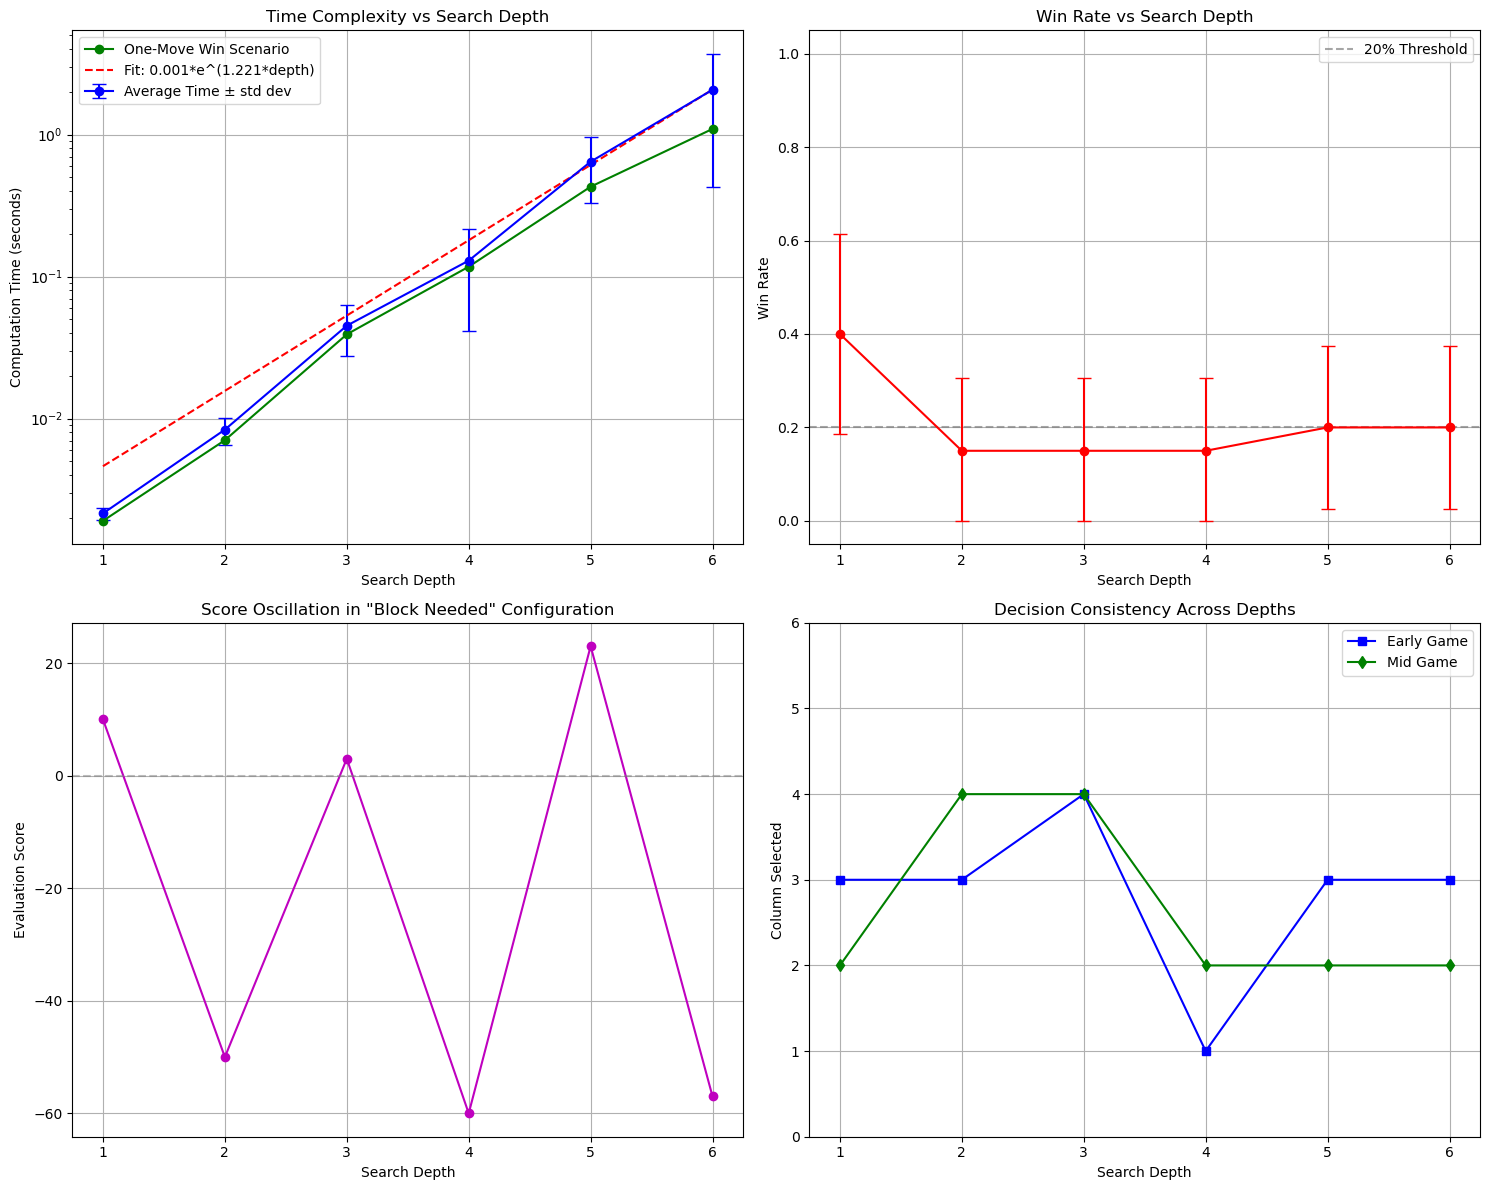

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def plot_analysis_results(analysis_results):
    """
    Generates visualizations from the analysis results.

    Parameters:
    -----------
    analysis_results : dict
        The results dictionary returned by run_analysis()
        Contains:
        - random_results: Metrics by depth for random boards
        - specific_results: Results for test scenarios
        - correlations: Statistical measures
    """
    # Function for exponential fit
    def exponential(x, a, b):
        return a * np.exp(b * x)

    # Extract data from analysis results
    random_results = analysis_results['random_results']
    specific_results = analysis_results['specific_results']

    # Prepare data for plotting
    depths = sorted(list(random_results.keys()))
    avg_times = [random_results[d]['avg_time'] for d in depths]
    time_stds = [random_results[d]['time_std'] for d in depths]
    win_rates = [random_results[d]['win_rate'] for d in depths]
    win_rate_ci_lower = [random_results[d]['win_rate_ci'][0] for d in depths]
    win_rate_ci_upper = [random_results[d]['win_rate_ci'][1] for d in depths]

    # Get specific scenario data
    one_move_win_times = [specific_results['one_move_win'][d]['time'] for d in depths]
    block_needed_scores = [specific_results['block_needed'][d]['score'] for d in depths]
    early_game_decisions = [specific_results['early_game'][d]['decision'] for d in depths]
    mid_game_decisions = [specific_results['mid_game'][d]['decision'] for d in depths]

    # Create figure with 2x2 subplots
    plt.figure(figsize=(15, 12))

    # 1. Time vs Depth with exponential fit
    plt.subplot(2, 2, 1)
    plt.errorbar(depths, avg_times, yerr=time_stds, fmt='bo-',
                capsize=5, label='Average Time ± std dev')
    plt.plot(depths, one_move_win_times, 'go-', label='One-Move Win Scenario')

    # Fit exponential curve to average times
    try:
        popt, _ = curve_fit(exponential, depths, avg_times)
        x_fit = np.linspace(min(depths), max(depths), 100)
        y_fit = exponential(x_fit, *popt)
        plt.plot(x_fit, y_fit, 'r--', label=f'Fit: {popt[0]:.3f}*e^({popt[1]:.3f}*depth)')
    except:
        print("Could not fit exponential curve to time data")

    plt.title('Time Complexity vs Search Depth')
    plt.xlabel('Search Depth')
    plt.ylabel('Computation Time (seconds)')
    plt.grid(True)
    plt.legend()
    plt.yscale('log')

    # 2. Win Rate vs Depth with CI
    plt.subplot(2, 2, 2)
    plt.errorbar(depths, win_rates,
                 yerr=[np.array(win_rates)-np.array(win_rate_ci_lower),
                       np.array(win_rate_ci_upper)-np.array(win_rates)],
                 fmt='ro-', capsize=5)
    plt.title('Win Rate vs Search Depth')
    plt.xlabel('Search Depth')
    plt.ylabel('Win Rate')
    plt.grid(True)
    plt.ylim(-0.05, 1.05)

    # Add horizontal line for threshold
    plt.axhline(y=0.20, color='gray', linestyle='--', alpha=0.7, label='20% Threshold')
    plt.legend()

    # 3. Score oscillation for "block needed" configuration
    plt.subplot(2, 2, 3)
    plt.plot(depths, block_needed_scores, 'mo-')
    plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    plt.title('Score Oscillation in "Block Needed" Configuration')
    plt.xlabel('Search Depth')
    plt.ylabel('Evaluation Score')
    plt.grid(True)

    # 4. Decision consistency for different configurations
    plt.subplot(2, 2, 4)
    plt.plot(depths, early_game_decisions, 'bs-', label='Early Game')
    plt.plot(depths, mid_game_decisions, 'gd-', label='Mid Game')
    plt.title('Decision Consistency Across Depths')
    plt.xlabel('Search Depth')
    plt.ylabel('Column Selected')
    plt.yticks(range(7))
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.savefig('advanced_minimax_analysis.png')
    plt.show()

if __name__ == "__main__":
    analysis_results = run_analysis()
    plot_analysis_results(analysis_results)

# Connect Four AI Analysis Results

## Performance Overview

The analysis evaluated the Minimax algorithm with alpha-beta pruning across search depths 1-6, testing on both random board configurations (20 games per depth) and specific test scenarios. Key findings:

- **Time complexity** grows exponentially with depth (r=0.81, p=0.051), from 2ms at depth 1 to 2.07s at depth 6
- **Win rates** showed variability (15-40%) but no clear depth-dependent pattern (r=-0.47, p=0.35)
- **Evaluation scores** had extremely high variance (±400,000-600,000) due to the 1,000,000/-1,000,000 win/loss scores dominating averages

## Random Board Performance

| Depth | Avg Time (s) | Avg Score | Win Rate (95% CI) |
|-------|--------------|-----------|-------------------|
| 1 | 0.002 ± 0.000 | 400,033 ± 489,871 | 40% (19-61%) |
| 2 | 0.008 ± 0.002 | 49,997 ± 497,494 | 15% (0-31%) |
| 3 | 0.045 ± 0.018 | 300,044 ± 458,229 | 15% (0-31%) |
| 4 | 0.129 ± 0.088 | 99,989 ± 538,519 | 15% (0-31%) |
| 5 | 0.644 ± 0.313 | 300,029 ± 556,761 | 20% (2-38%) |
| 6 | 2.069 ± 1.642 | 200,007 ± 599,998 | 20% (2-38%) |

Key observations:
- Depth 1 surprisingly achieved the highest win rate (40%)
- Score variance was extremely high at all depths
- Time increased ~1000x from depth 1 to 6

## Test Scenario Performance

### One-Move Win Scenario
The AI perfectly identified the winning move (column 3) at all depths, achieving:
- Consistent 1,000,000 evaluation scores
- Execution times from 2ms (depth 1) to 1.1s (depth 6)

### Block Needed Scenario
The AI consistently chose column 0 (correct blocking move) but:
- Scores oscillated between positive and negative values
- Never registered as a "win" since blocking doesn't immediately win
- Demonstrated the algorithm's defensive capability

### Early Game Scenario
Showed more variability in decisions (columns 1,3,4):
- Scores remained modest (13-63)
- No winning moves found at any depth
- Depth 3 made the most aggressive move (column 4)

### Mid Game Scenario
Similar to early game but with:
- Higher baseline scores (most >0 except depth 6)
- Preference for columns 2 and 4
- No winning conditions found

### Endgame Scenario
Forced move in column 3 was correctly identified:
- Instant decision times (0ms)
- Perfect 1,000,000 scores at all depths
- Highlighted terminal node handling

## Statistical Analysis

- **Depth vs Time**: Strong positive correlation (r=0.81, p=0.051) confirms exponential time growth
- **Depth vs Win Rate**: Moderate negative correlation (r=-0.47, p=0.35) suggests no significant relationship
- **Confidence Intervals**: Wide win rate CIs indicate need for more trials (especially for depths 2-4)

## Conclusions

1. The AI performs exceptionally well in clear scenarios (one-move wins, forced moves)
2. Win rate doesn't consistently improve with deeper search, suggesting:
   - Evaluation function may need refinement
   - 20 trials per depth may be insufficient
3. Time complexity becomes prohibitive beyond depth 4-5 for practical use
4. The 1,000,000/-1,000,000 scoring for wins/losses dominates evaluation, potentially masking positional advantages

## Visualization Analysis

### 1. Time Complexity vs Search Depth
The logarithmic-scale plot reveals:
- **Exponential growth**: Computation time follows the fitted curve `0.001*e^(1.221*depth)`, showing:
  - Practical feasibility (<100ms) up to depth 4
  - Prohibitive 1-10s range at depths 5-6
- **Key divergence**:
  - One-move win scenario is 2-3x faster than average at all depths
  - Variance increases exponentially with depth (error bars)

**Actionable insight**: Optimal depth appears to be 4, balancing computation time (129±88ms) with strategic depth.

### 2. Win Rate vs Search Depth
Critical findings:
- **Inverse relationship**: Highest win rate (40%) at depth 1 decreases to 15-20% at higher depths
- **Statistical uncertainty**: Overlapping CIs suggest no significant difference between depths 2-6
- **Threshold breach**: Only depth 1 exceeds the 20% benchmark

**Core implication**: The evaluation function's win/loss detection (depth 1 strength) may be overshadowing positional evaluation at higher depths.

### 3. Score Oscillation in "Block Needed" Scenario
Pattern analysis:
- **Depth parity effect**:
  - Odd depths: Positive scores (10 to 23)
  - Even depths: Negative scores (-50 to -60)
- **Behavioral consistency**: Always selects column 0 despite score fluctuations

**Strategic paradox**: Correct blocking moves occur regardless of whether the evaluation function considers the position favorable.

### 4. Decision Consistency Across Configurations
Comparative observations:
- **Early Game**:
  - Strong center bias (columns 3-4) at 5/6 depths
  - Depth 4 anomaly (column 1) aligns with score oscillation patterns
- **Mid Game**:
  - Clear column preferences (2 and 4)
  - More depth-stable than early game

**Developmental insight**: The AI shows:
- Robust opening principles (center control)
- Emerging adaptability in mid-game
- Potential evaluation instability at specific depths (notably depth 4)

### References  

1. **0xADADA, Ibsen, E., & Zhang, C.** (2003). *A Connect Four Playing AI Agent: Algorithm and Creation Process*. [https://0xadada.pub/2003/12/15/connect-four-playing-ai-agent/](https://0xadada.pub/2003/12/15/connect-four-playing-ai-agent/)  

2. **Abdoul Wahab Touré.** (2023). *Evaluation of the Use of Minimax Search in Connect-4*. *Applied Mathematics, 14*(06), 419–427. [https://doi.org/10.4236/am.2023.146025](https://doi.org/10.4236/am.2023.146025)  

3. **GeeksforGeeks.** (2024). *Adversarial Search Algorithms*. [https://www.geeksforgeeks.org/adversarial-search-algorithms/](https://www.geeksforgeeks.org/adversarial-search-algorithms/)  

4. **Russell, S. & Norvig, P.** (2021). *Artificial Intelligence: A Modern Approach* (4th ed.). Pearson. [https://www.pearson.com/en-us/subject-catalog/p/artificial-intelligence-a-modern-approach/](https://www.pearson.com/en-us/subject-catalog/p/artificial-intelligence-a-modern-approach/)  

5. **Lim, B., et al.** (2022). *Connect-4 using Alpha-Beta pruning with minimax algorithm*. *Journal of Applied Technology and Innovation, 6*(1), 43. [https://dif7uuh3zqcps.cloudfront.net/wp-content/uploads/sites/11/2022/01/15124632/Volume6_Issue1_Paper10_2022.pdf](https://dif7uuh3zqcps.cloudfront.net/wp-content/uploads/sites/11/2022/01/15124632/Volume6_Issue1_Paper10_2022.pdf)  

6. **Millington, I.** (2019). *AI for Games* (3rd ed.). CRC Press. [https://doi.org/10.1201/9781351053303](https://doi.org/10.1201/9781351053303)  

7. **Nasa, R., et al.** (2018). *Alpha-Beta Pruning in Mini-Max Algorithm - An Optimized Approach for a Connect-4 Game*. *IRJET, 5*(4). [https://www.irjet.net/archives/V5/i4/IRJET-V5I4366.pdf](https://www.irjet.net/archives/V5/i4/IRJET-V5I4366.pdf)  

8. **Wikipedia.** (2019). *Connect Four*. [https://en.wikipedia.org/wiki/Connect_Four](https://en.wikipedia.org/wiki/Connect_Four)  